# **Exploratory Data Analysis (EDA) for Mars Weather Analysis**

## **1. Introduction**
### **Dataset Overview**
- The dataset consists of Martian weather data collected by the **REMS instrument on NASA's Curiosity rover**.
- It contains **3,197 records** spanning multiple Martian years, with variables covering **temperature, pressure, UV radiation, and day length**.

### **Objectives of EDA**
- Understand feature relationships and trends.
- Investigate seasonal and cyclical trends for air and ground temperature, mean atmospheric pressure, and UV Radiation.
- Detect outliers and anomalies.

### **Key Questions to Explore**
- Are temperature and pressure correlated?
- How do seasonal and yearly trends affect Martian weather?
- What role does **day length** play in temperature variations?
- Are there **outliers or extreme events** in the dataset?

---

## **2. Data Overview**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import pearsonr, spearmanr, kendalltau
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from library.utilities import decompose_adf
from statsmodels.tsa.stattools import grangercausalitytests

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

### **2.1 Load and Inspect Data**

In [43]:
mars_df = pd.read_csv('../Datasets/mars_weather_cleaned.csv', index_col='sol_number')
mars_df.head()

earth_date_time     Ls  mars_month  mars_year mars_season  \
sol_number                                                             
1               2012-08-07  150.0           6          1      winter   
9               2012-08-15  155.0           6          1      winter   
10              2012-08-16  155.0           6          1      winter   
11              2012-08-17  156.0           6          1      winter   
12              2012-08-18  156.0           6          1      winter   

             sunrise    sunset  day_length  avg_ground_temp  max_ground_temp  \
sol_number                                                                     
1           05:30:00  17:22:00       712.0            -45.5            -16.0   
9           05:28:00  17:22:00       714.0            -45.5            -16.0   
10          05:28:00  17:22:00       714.0            -45.5            -16.0   
11          05:28:00  17:21:00       713.0            -43.5            -11.0   
12          05:28:00  17:21:00       713.0            -47.0            -18.0   

            min_ground_temp  avg_air_temp  max_air_temp  min_air_temp  \
sol_number                                                              
1                     -75.0         -37.5           8.0         -83.0   
9                     -75.0         -37.5           8.0         -83.0   
10                    -75.0         -37.5           8.0         -83.0   
11                    -76.0         -37.0           9.0         -83.0   
12                    -76.0         -37.0           8.0         -82.0   

            mean_pressure  UV_Radiation  
sol_number                               
1                   739.0             4  
9                   739.0             4  
10                  739.0             4  
11                  740.0             4  
12                  741.0             4

### **2.2 Summary Statistics**

In [44]:
mars_df.describe()

Ls   mars_month    mars_year   day_length  avg_ground_temp  \
count  3197.000000  3197.000000  3197.000000  3197.000000      3197.000000   
mean    166.959962     6.083203     3.507038   718.169221       -44.097279   
std     104.356771     3.466172     1.500218    12.036363         7.401663   
min       0.000000     1.000000     1.000000   702.000000       -72.500000   
25%      78.000000     3.000000     2.000000   707.000000       -50.500000   
50%     156.000000     6.000000     3.000000   716.000000       -43.000000   
75%     254.000000     9.000000     5.000000   730.000000       -37.500000   
max     359.000000    12.000000     6.000000   738.000000       -26.500000   

       max_ground_temp  min_ground_temp  avg_air_temp  max_air_temp  \
count      3197.000000      3197.000000   3197.000000   3197.000000   
mean        -13.182828       -75.011730    -39.147357      2.011730   
std          10.489177         5.529929      7.262277      9.398862   
min         -67.000000      -100.000000    -75.500000    -61.000000   
25%         -23.000000       -79.000000    -45.500000     -6.000000   
50%         -12.000000       -75.000000    -38.000000      3.000000   
75%          -4.000000       -71.000000    -33.000000     10.000000   
max          11.000000       -52.000000     -1.500000     24.000000   

       min_air_temp  mean_pressure  UV_Radiation  
count   3197.000000    3197.000000   3197.000000  
mean     -80.306537     828.997028      2.583359  
std        8.824723      57.224328      0.692132  
min     -136.000000     702.000000      1.000000  
25%      -86.000000     785.000000      2.000000  
50%      -80.000000     844.000000      3.000000  
75%      -75.000000     873.000000      3.000000  
max       -8.000000     925.000000      4.000000

---

## 3. Temperature

### 3.1 Air Temperature

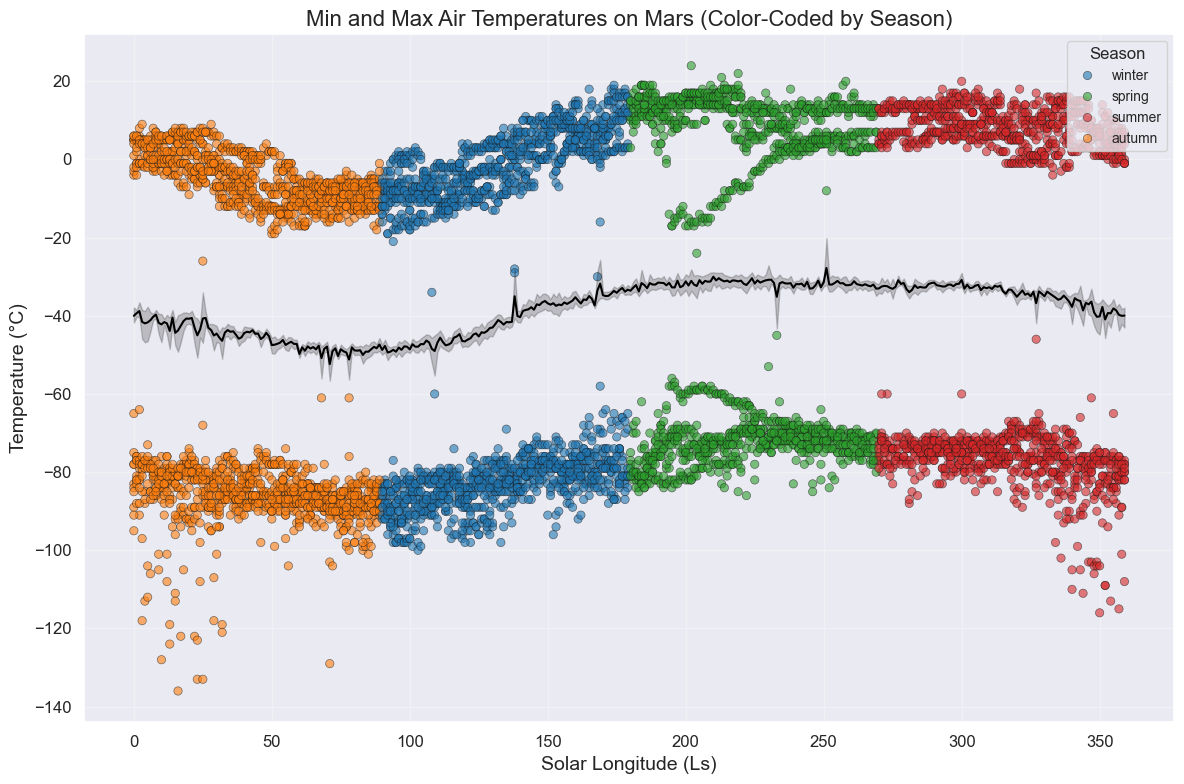

In [45]:
# Define a consistent color palette for the Martian seasons
season_palette = {
    "spring": "#2ca02c",  # Green
    "summer": "#d62728",   # Red
    "autumn": "#ff7f0e",  # Orange
    "winter": "#1f77b4"  # Blue
}

# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot for min air temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='min_air_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Scatter plot for max air temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='max_air_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Line plot for average air temperatures
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='avg_air_temp',
    color='black'
)

# Customize the plot
plt.title('Min and Max Air Temperatures on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

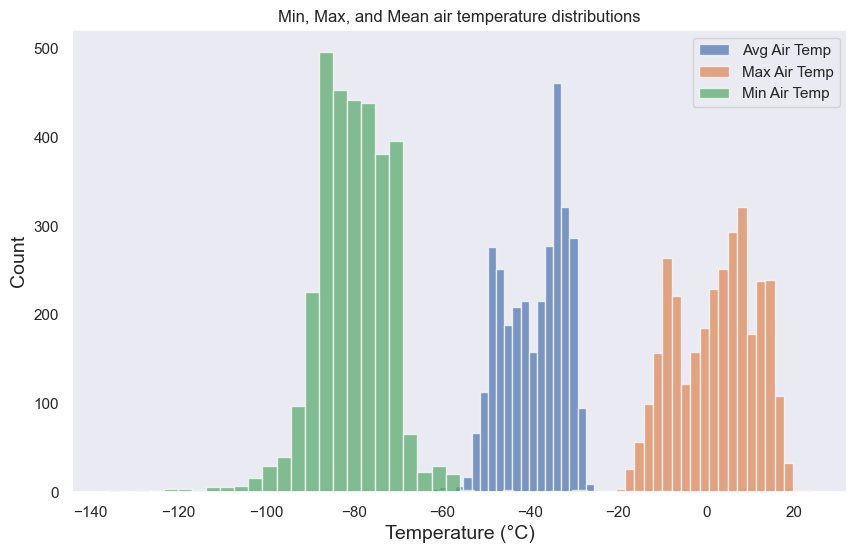

In [46]:
plt.figure(figsize=(10,6))
mars_df['avg_air_temp'].hist(bins=40, alpha=0.7, label='Avg Air Temp')
mars_df['max_air_temp'].hist(bins=40, alpha=0.7, label='Max Air Temp')
mars_df['min_air_temp'].hist(bins=40, alpha=0.7, label='Min Air Temp')
plt.grid(False)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Min, Max, and Mean air temperature distributions')
plt.legend()
plt.show()

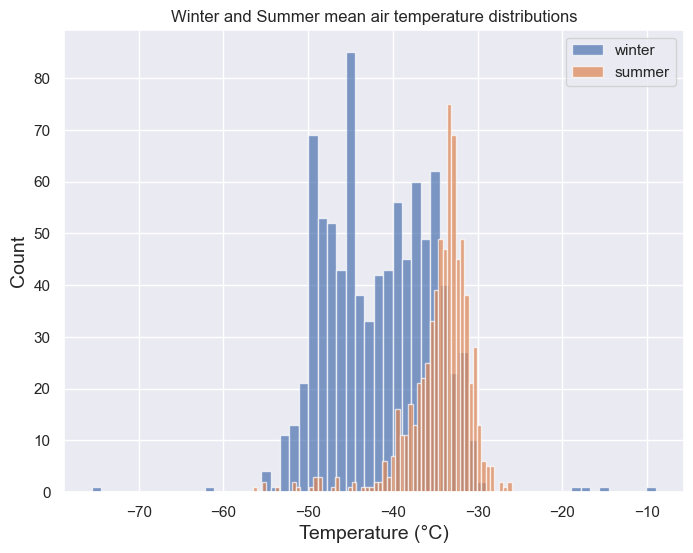

In [47]:
plt.figure(figsize=(8,6))
mars_df[mars_df['mars_season'] == 'winter']['avg_air_temp'].hist(bins=60, alpha=0.7, label='winter')
mars_df[mars_df['mars_season'] == 'summer']['avg_air_temp'].hist(bins=60, alpha=0.7, label='summer')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Winter and Summer mean air temperature distributions')
plt.legend()
plt.show()

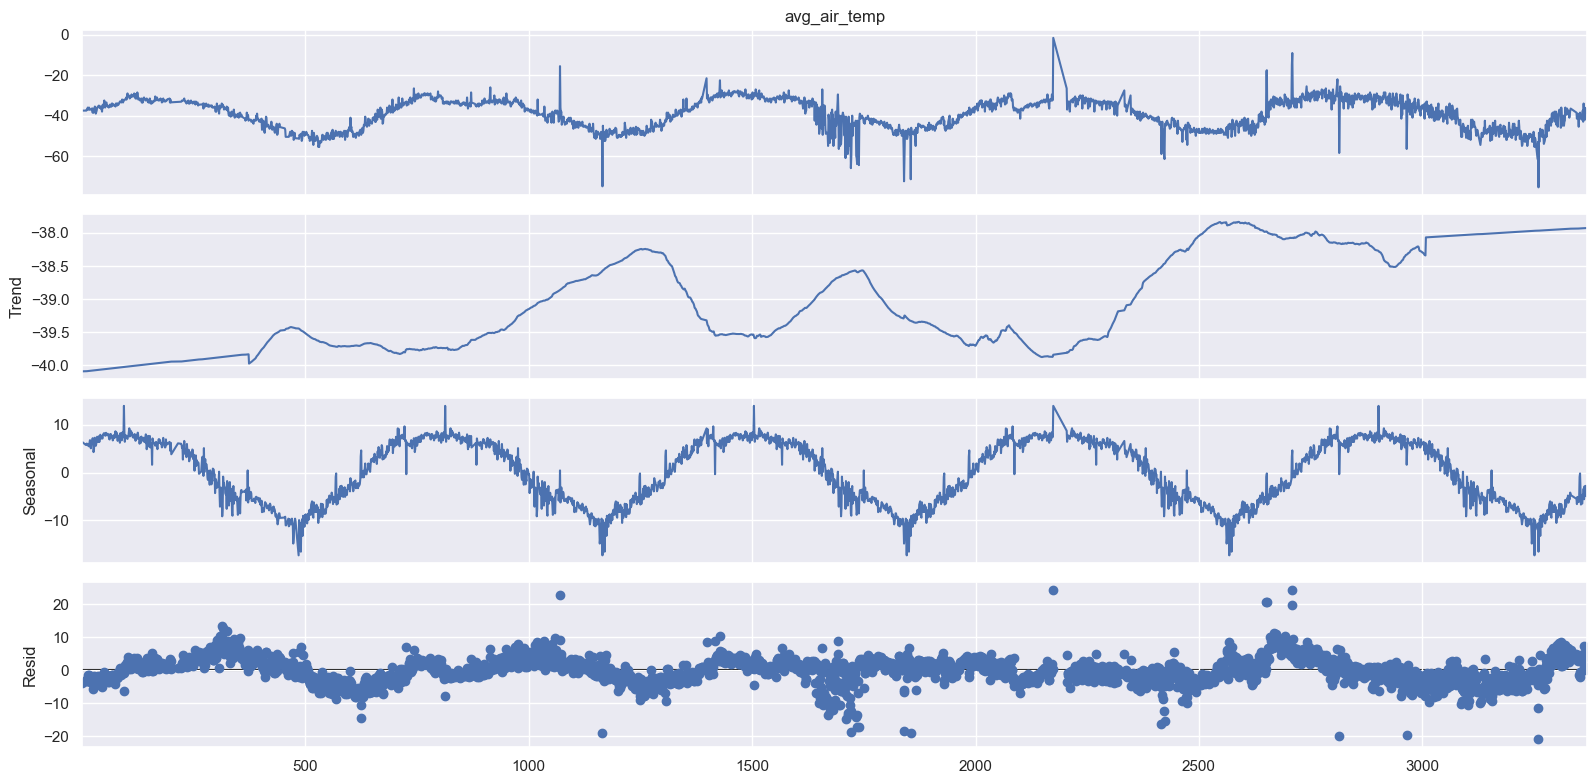

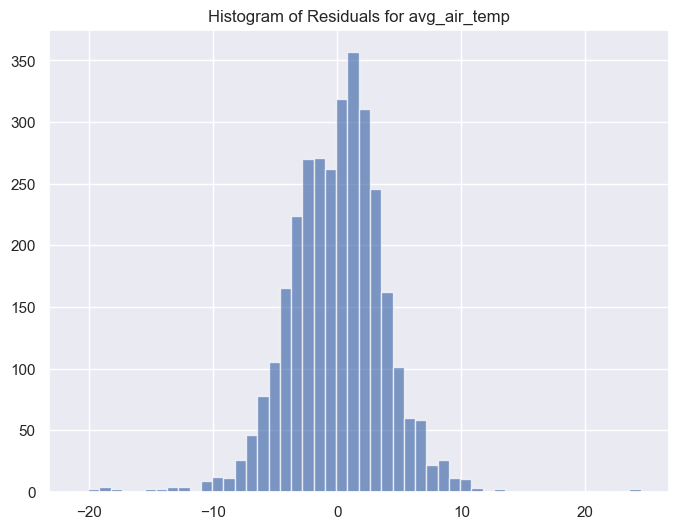

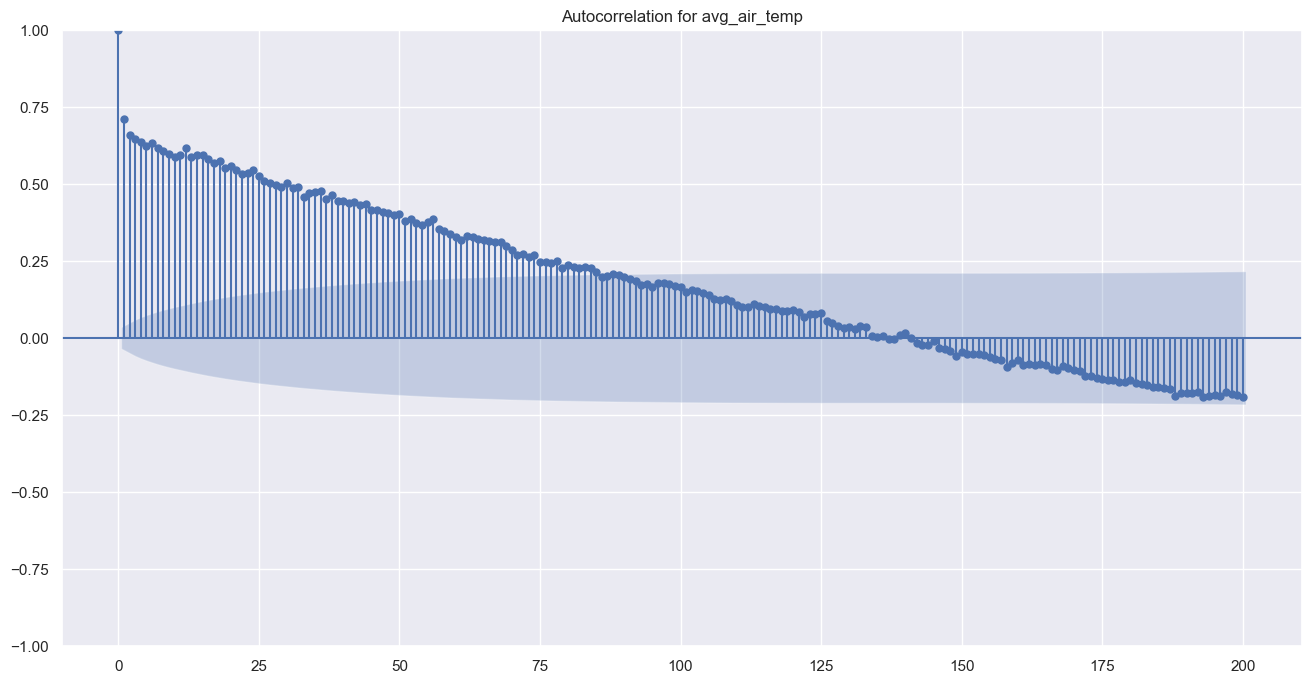


ADF Test Results for avg_air_temp:
1. ADF Statistic: -4.011296905040681
2. P-Value: 0.0013524989523057641
3. Num of Lags: 14
4. Num of Observations: 3182
5. Critical Values:
	1%: -3.4324067514593626
	5%: -2.8624487475060336
	10%: -2.5672537469447287


In [48]:
decompose_adf(mars_df,'avg_air_temp')

As one might expect, air temperature is highly autocorrelated.

<Axes: title={'center': 'Rolling mean for average air temperature over annual periods'}, xlabel='sol_number'>

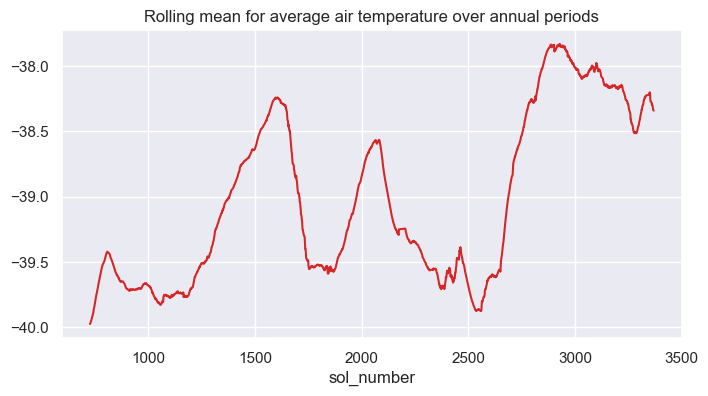

In [49]:
mars_df['avg_air_temp'].rolling(window = 668).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for average air temperature over annual periods")

<Axes: title={'center': 'Rolling variance for average air temperature over annual periods'}, xlabel='sol_number'>

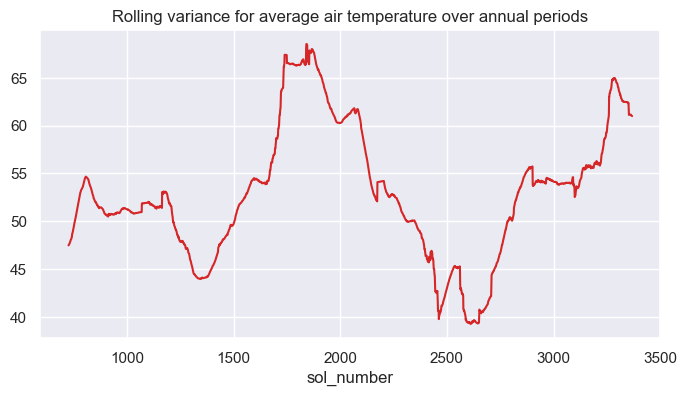

In [50]:
mars_df['avg_air_temp'].rolling(window = 668).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for average air temperature over annual periods")

### 3.2 Ground Temperature

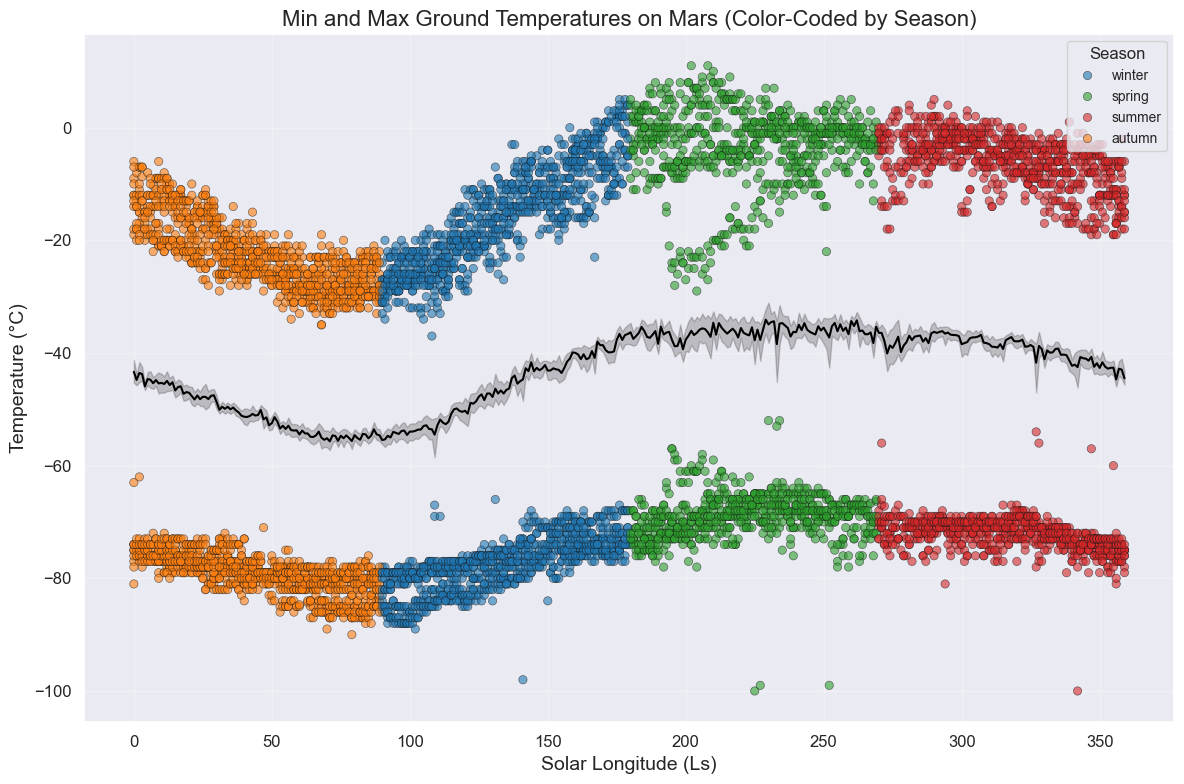

In [51]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot for min ground temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='min_ground_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Scatter plot for max ground temperature
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='max_ground_temp',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Line plot for average ground temperatures
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='avg_ground_temp',
    color='black'
)

# Customize the plot
plt.title('Min and Max Ground Temperatures on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

Ground temperature appears to have significantly less variation than air temperature. We do however see a large deviation from the standard structure in the Spring season. 

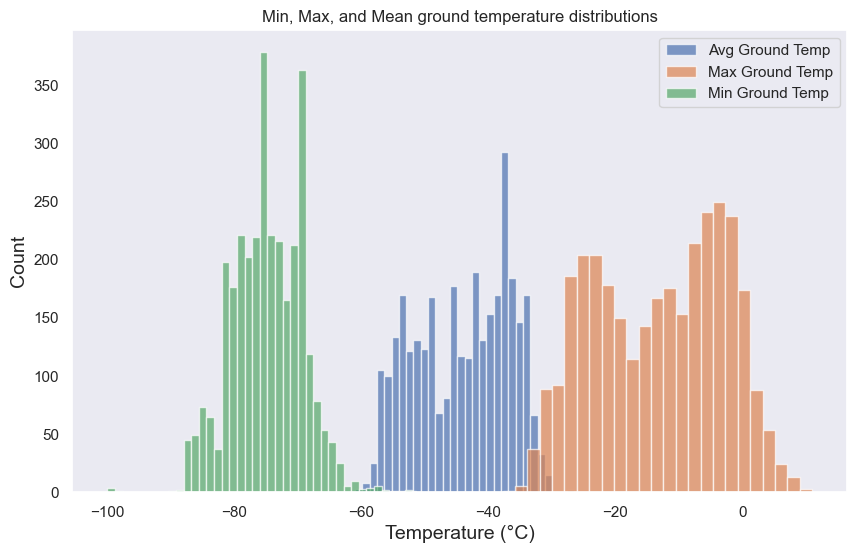

In [52]:
plt.figure(figsize=(10,6))
mars_df['avg_ground_temp'].hist(bins=40, alpha=0.7, label='Avg Ground Temp')
mars_df['max_ground_temp'].hist(bins=40, alpha=0.7, label='Max Ground Temp')
mars_df['min_ground_temp'].hist(bins=40, alpha=0.7, label='Min Ground Temp')
plt.grid(False)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Min, Max, and Mean ground temperature distributions')
plt.legend()
plt.show()

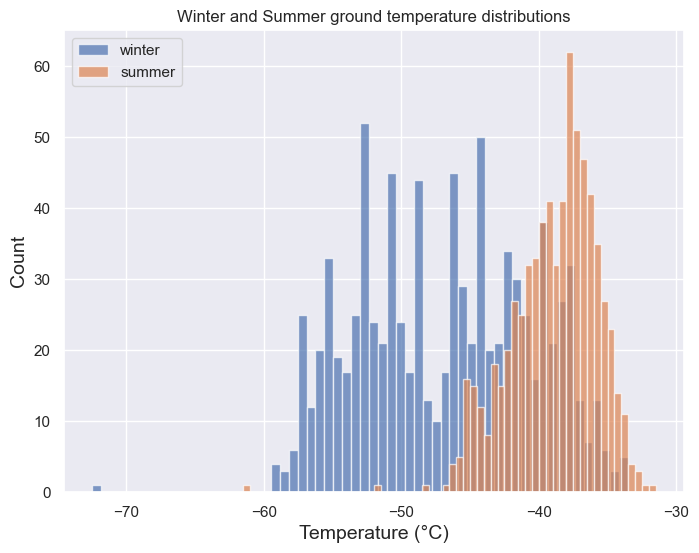

In [53]:
plt.figure(figsize=(8,6))
mars_df[mars_df['mars_season'] == 'winter']['avg_ground_temp'].hist(bins=60, alpha=0.7, label='winter')
mars_df[mars_df['mars_season'] == 'summer']['avg_ground_temp'].hist(bins=60, alpha=0.7, label='summer')
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Winter and Summer ground temperature distributions')
plt.legend()
plt.show()

It appears that ground temperature holds all the same seasonal trends while maintaining seasonal trends and the temperature impact from the global dust storm in 2018.

Ground temperature is likely to be a superior predictor for martian temperature. Do hypothesis testing to confirm.

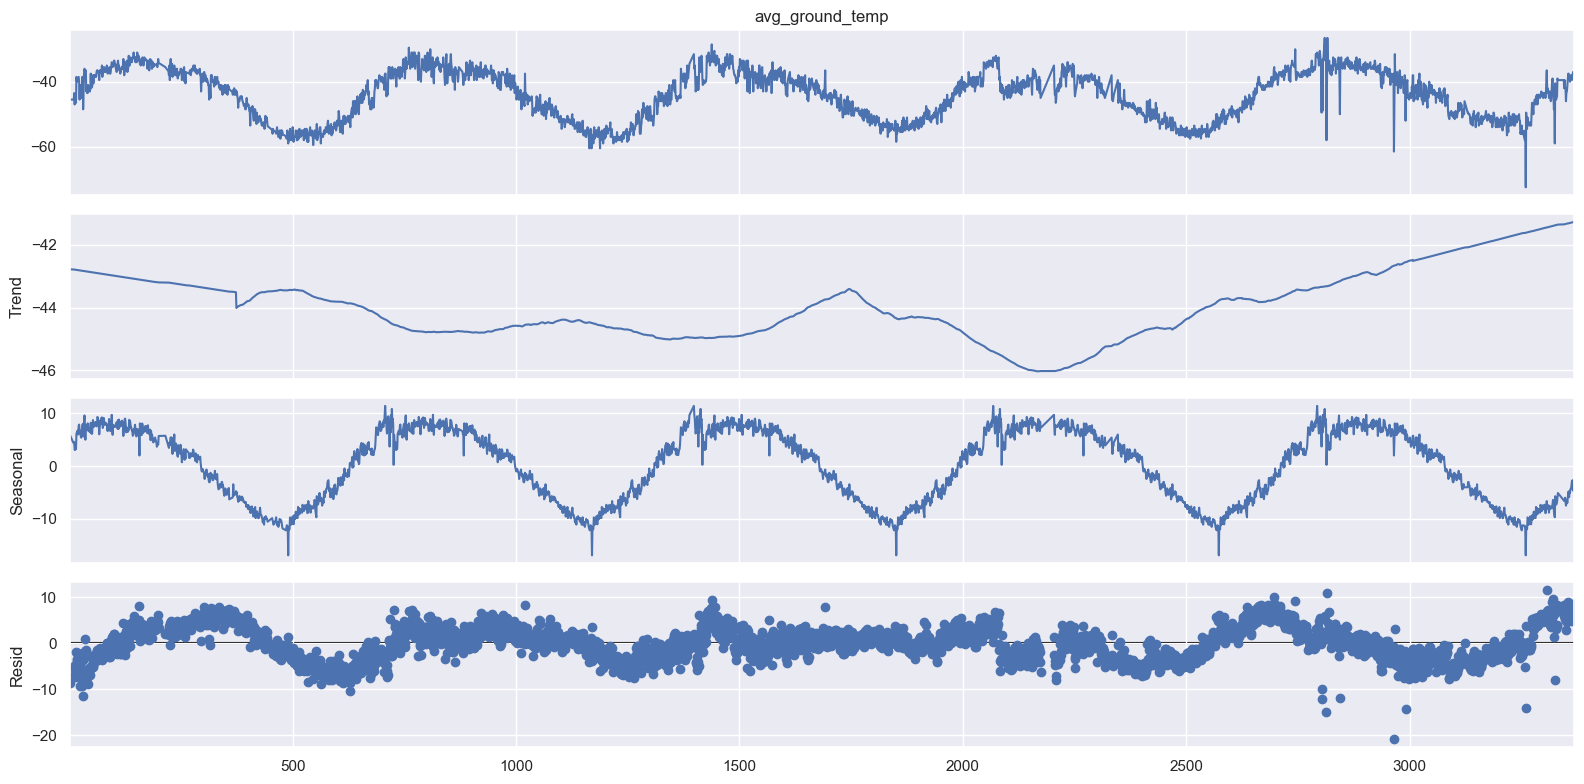

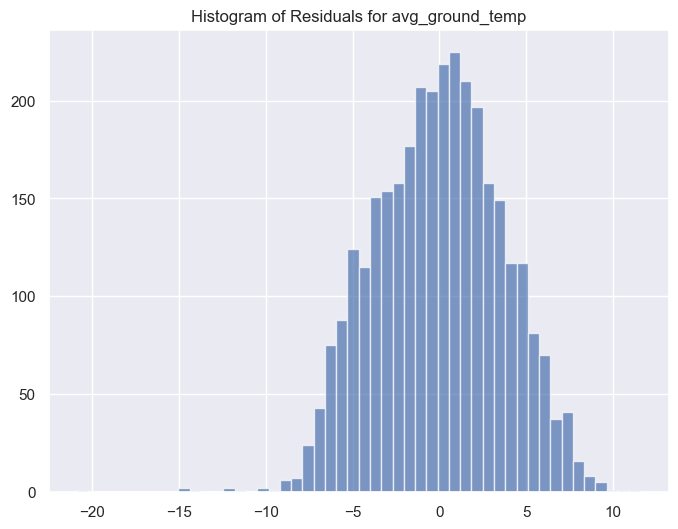

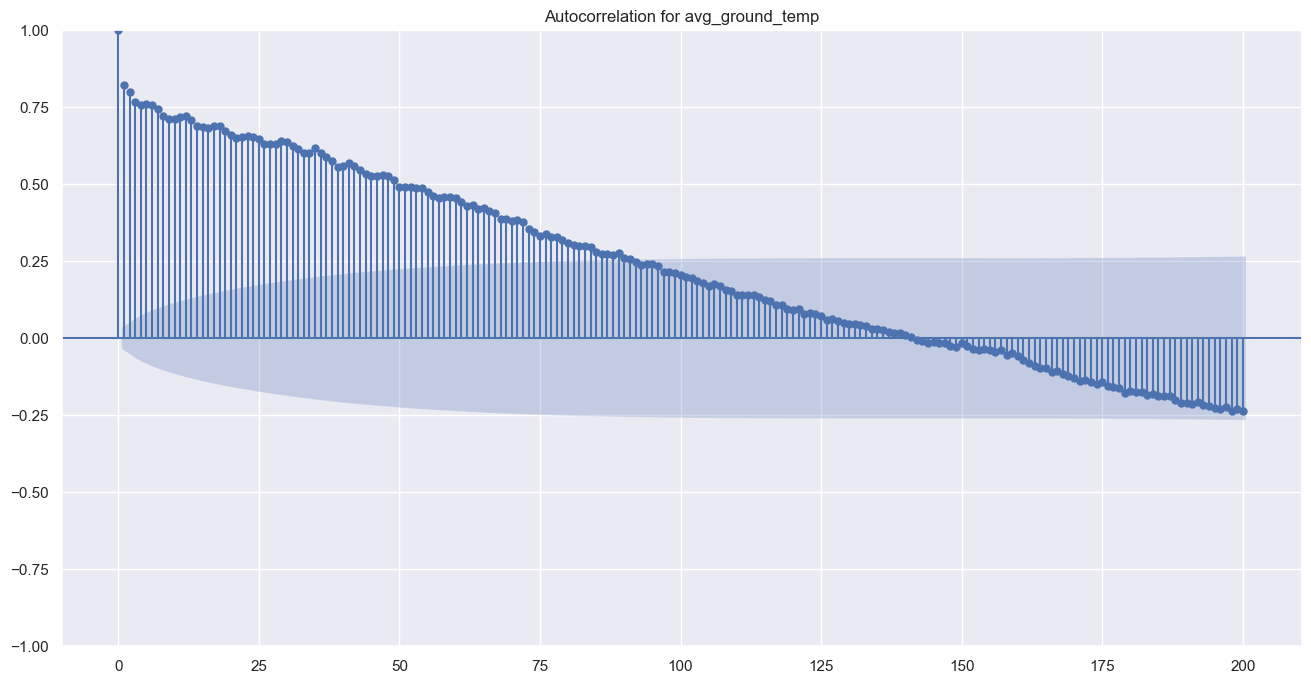


ADF Test Results for avg_ground_temp:
1. ADF Statistic: -2.6411351794899924
2. P-Value: 0.08478994166886011
3. Num of Lags: 28
4. Num of Observations: 3168
5. Critical Values:
	1%: -3.4324158480194886
	5%: -2.862452765302856
	10%: -2.5672558859467465


In [54]:
decompose_adf(mars_df, 'avg_ground_temp')

It is a bit strange that ground temperature seems to be less autocorrelated than air temperature. The differences between air and ground temperature will be worth exploring in a later notebook as there are likely different primary factors affecting temperature.

<Axes: title={'center': 'Rolling mean for average ground temperature over monthly periods'}, xlabel='sol_number'>

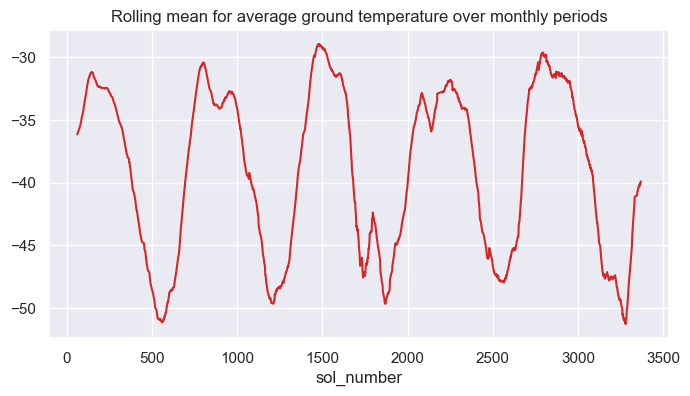

In [92]:
mars_df['avg_air_temp'].rolling(window = 56).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for average ground temperature over monthly periods")

<Axes: title={'center': 'Rolling variance for average ground temperature over monthly periods'}, xlabel='sol_number'>

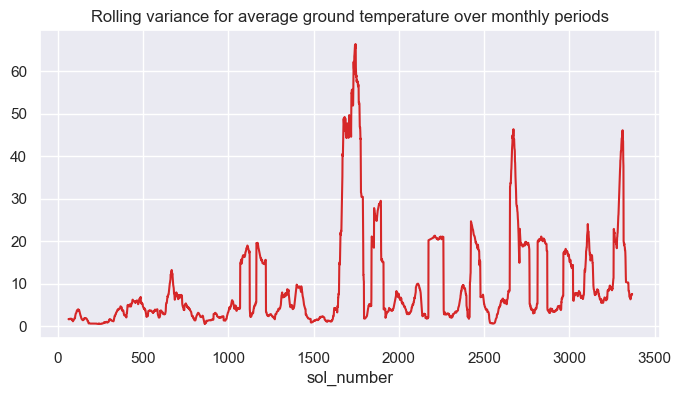

In [93]:
mars_df['avg_air_temp'].rolling(window = 56).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for average ground temperature over monthly periods")

---

## 4. Atmospheric Pressure

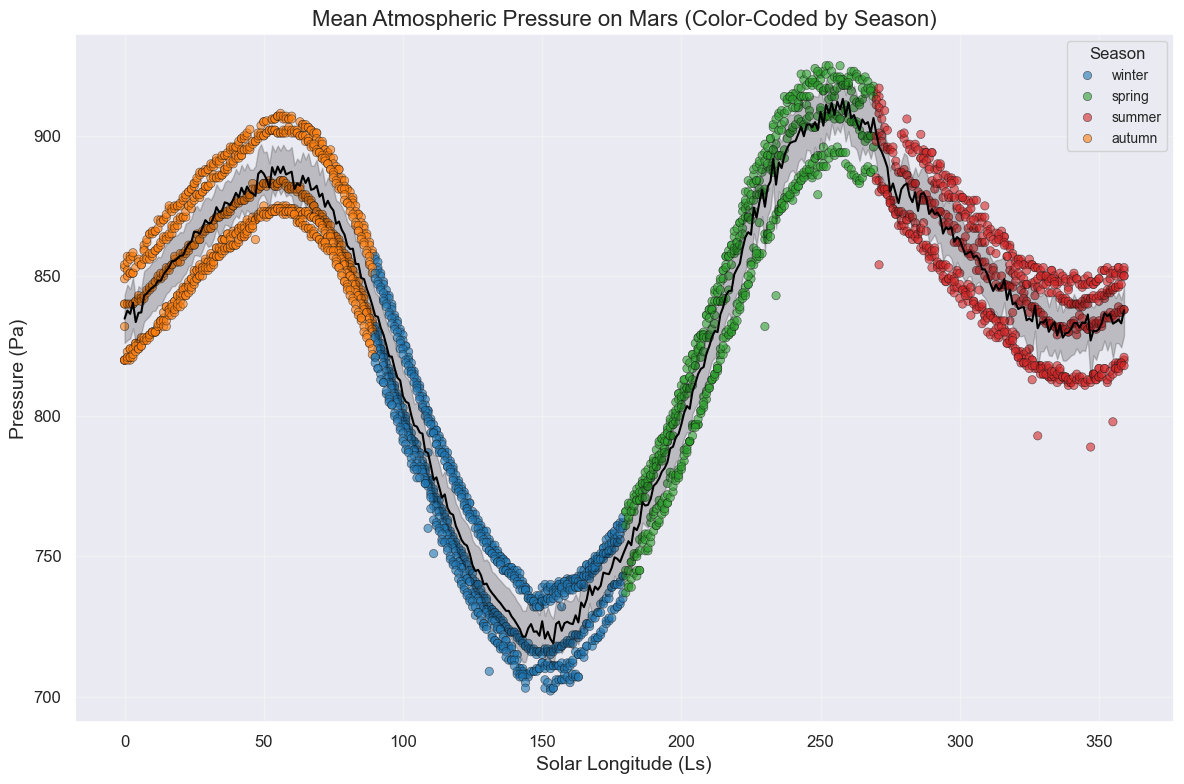

In [57]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='mean_pressure',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)


# Line plot
sns.lineplot(
    data=mars_df,
    x='Ls',
    y='mean_pressure',
    color='black'
)

# Customize the plot
plt.title('Mean Atmospheric Pressure on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Pressure (Pa)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

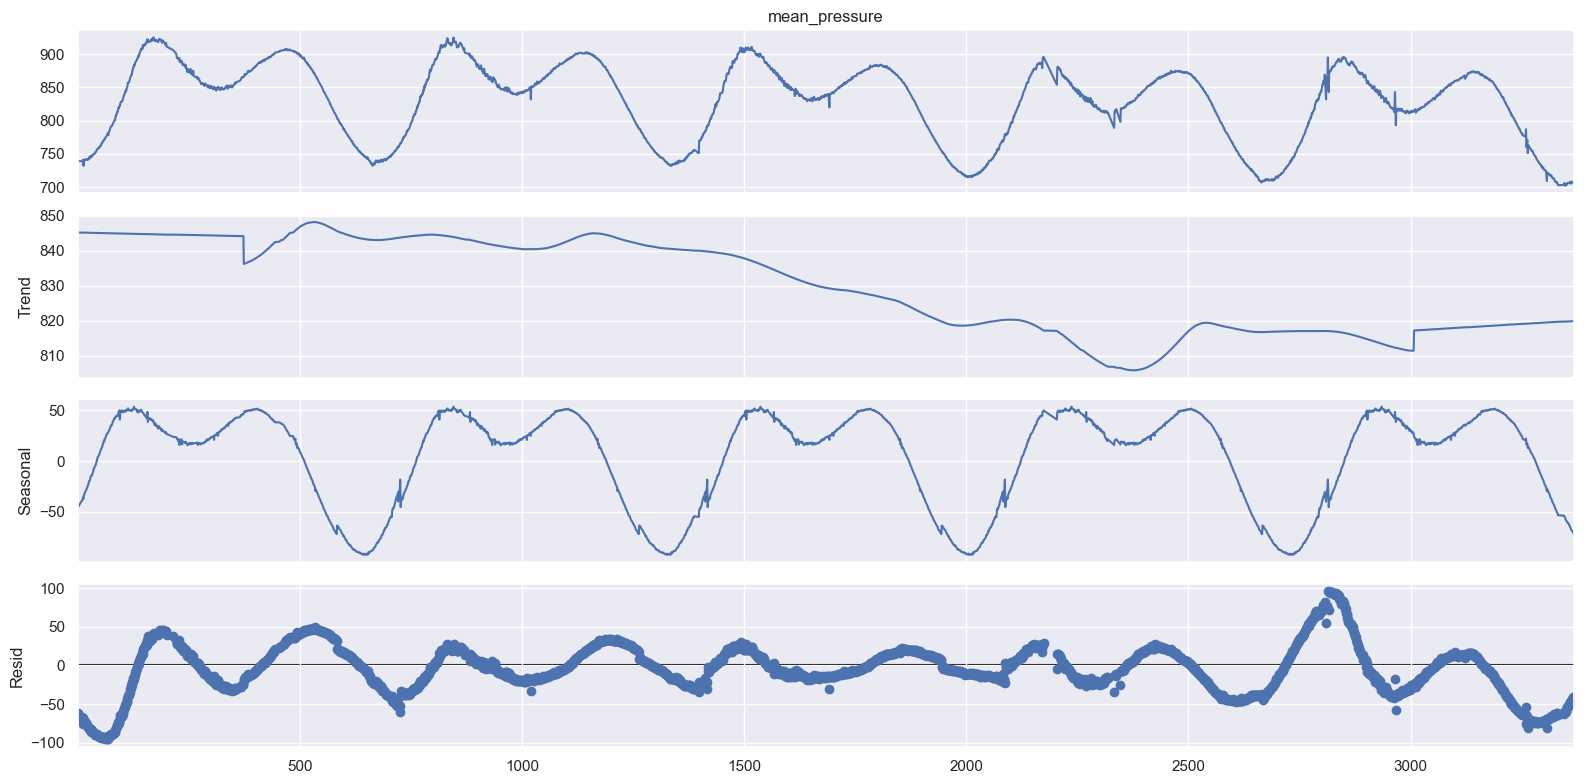

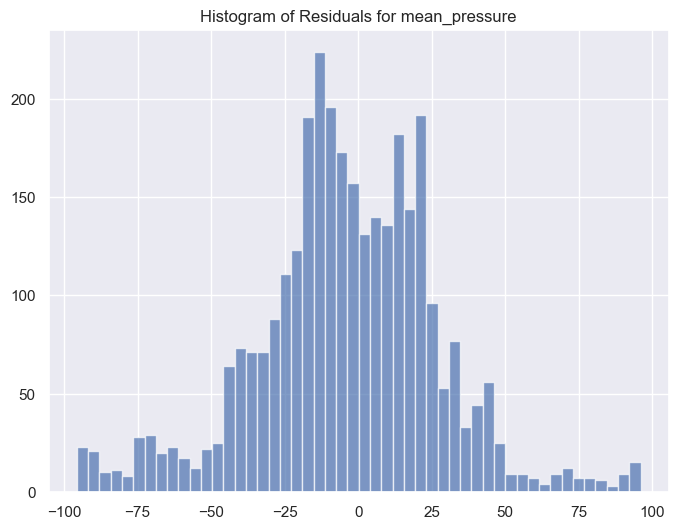

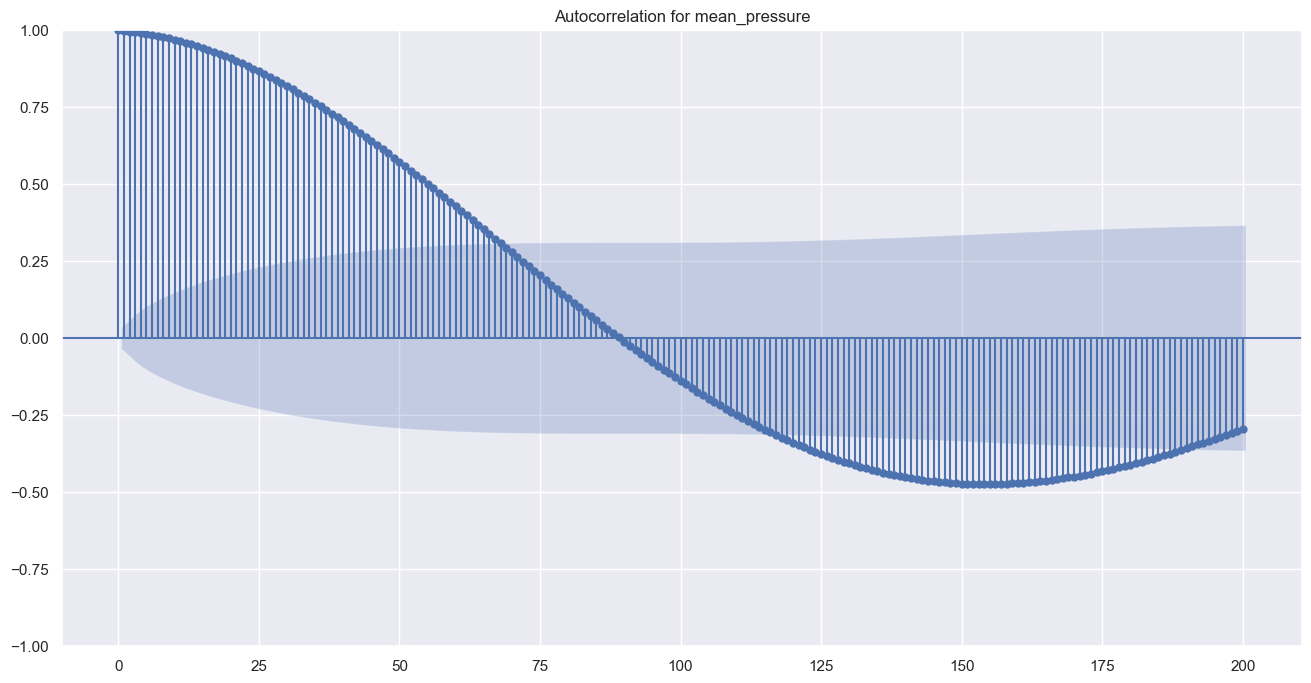


ADF Test Results for mean_pressure:
1. ADF Statistic: -7.510178575894843
2. P-Value: 4.034963642059138e-11
3. Num of Lags: 24
4. Num of Observations: 3172
5. Critical Values:
	1%: -3.4324132408020374
	5%: -2.8624516137402374
	10%: -2.5672552728755234


In [58]:
decompose_adf(mars_df,'mean_pressure')

Pressure is extremely autocorrelated with strong seasonal trends. It is interesting to note that the seasonal trend is bimodal. 

<Axes: title={'center': 'Rolling mean for atmospheric pressure over monthly periods'}, xlabel='sol_number'>

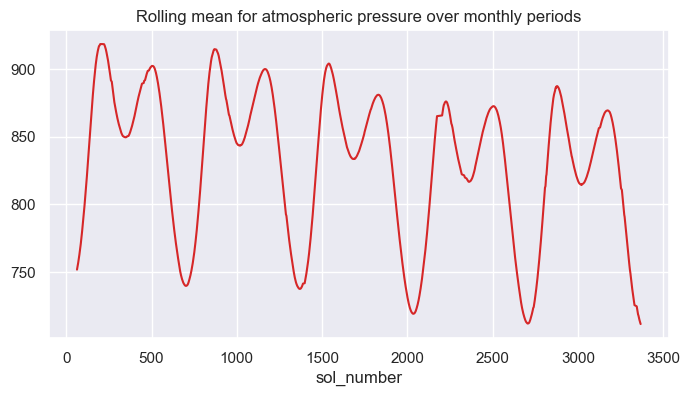

In [89]:
mars_df['mean_pressure'].rolling(window = 56).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean for atmospheric pressure over monthly periods")

<Axes: title={'center': 'Rolling variance for atmospheric pressure over monthly periods'}, xlabel='sol_number'>

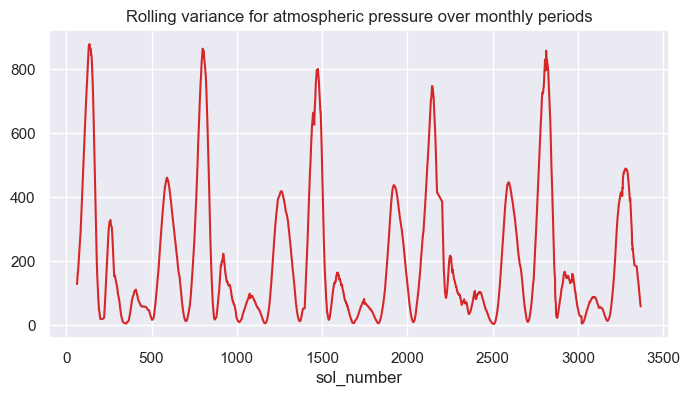

In [87]:
mars_df['mean_pressure'].rolling(window = 56).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance for atmospheric pressure over monthly periods")

---

## 5. UV Radiation

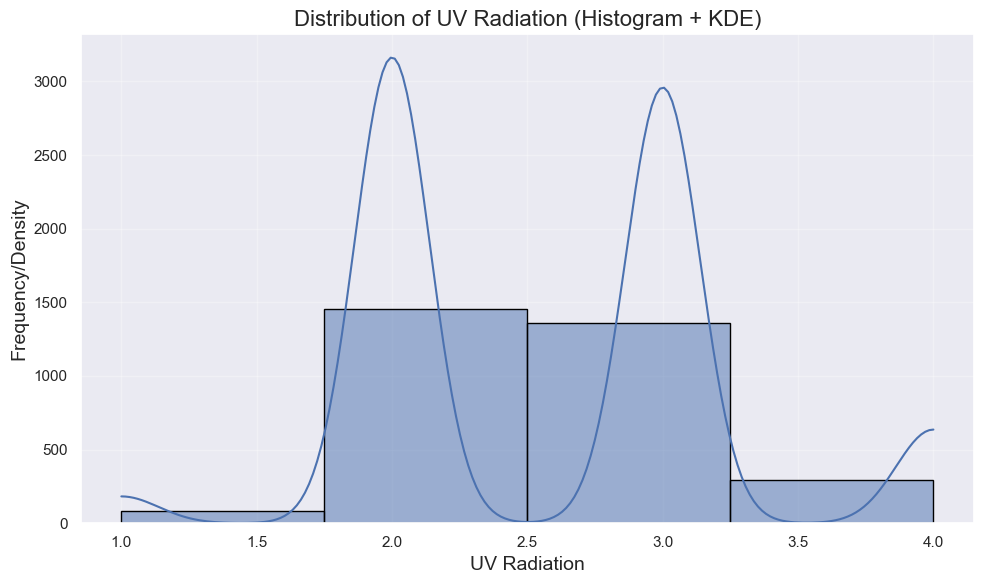

In [62]:
# Combined plot (Histogram + KDE)
plt.figure(figsize=(10, 6))
sns.histplot(mars_df['UV_Radiation'], bins=4, kde=True, color='b', edgecolor='black')
plt.title('Distribution of UV Radiation (Histogram + KDE)', fontsize=16)
plt.xlabel('UV Radiation', fontsize=14)
plt.ylabel('Frequency/Density', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()

# Show Figure
plt.show()

Most days have are listed as 'Moderate' and 'High' UV Radiation days. It would be interesting to see how this looks across each seasoon.

<Figure size 1500x1000 with 0 Axes>

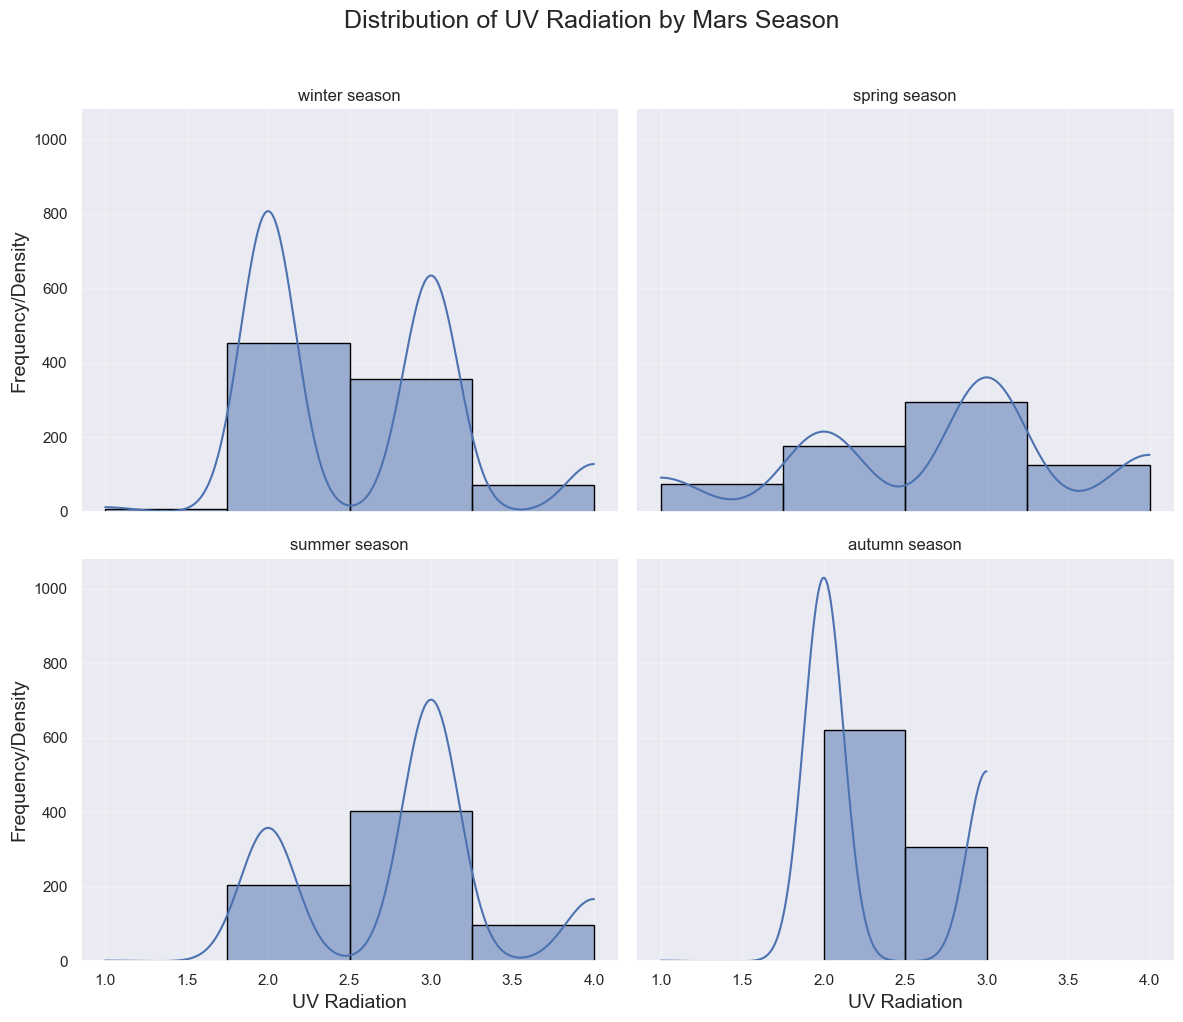

In [63]:
# Separate plots for each Mars season
plt.figure(figsize=(15, 10))

# Create a FacetGrid to separate by mars_season
g = sns.FacetGrid(mars_df, col='mars_season', height=5, aspect=1.2, col_wrap=2)

# Map the histplot with KDE for each season
g.map_dataframe(sns.histplot, x='UV_Radiation', bins=4, kde=True, color='b', edgecolor='black')

# Add titles and labels
g.set_axis_labels('UV Radiation', 'Frequency/Density', fontsize=14)
g.set_titles(col_template='{col_name} season', fontsize=16)
g.fig.suptitle('Distribution of UV Radiation by Mars Season', fontsize=18, y=1.02)

# Adjust the aesthetics
g.fig.tight_layout()
for ax in g.axes.flat:
    ax.grid(alpha=0.3)

# Show the plot
plt.show()

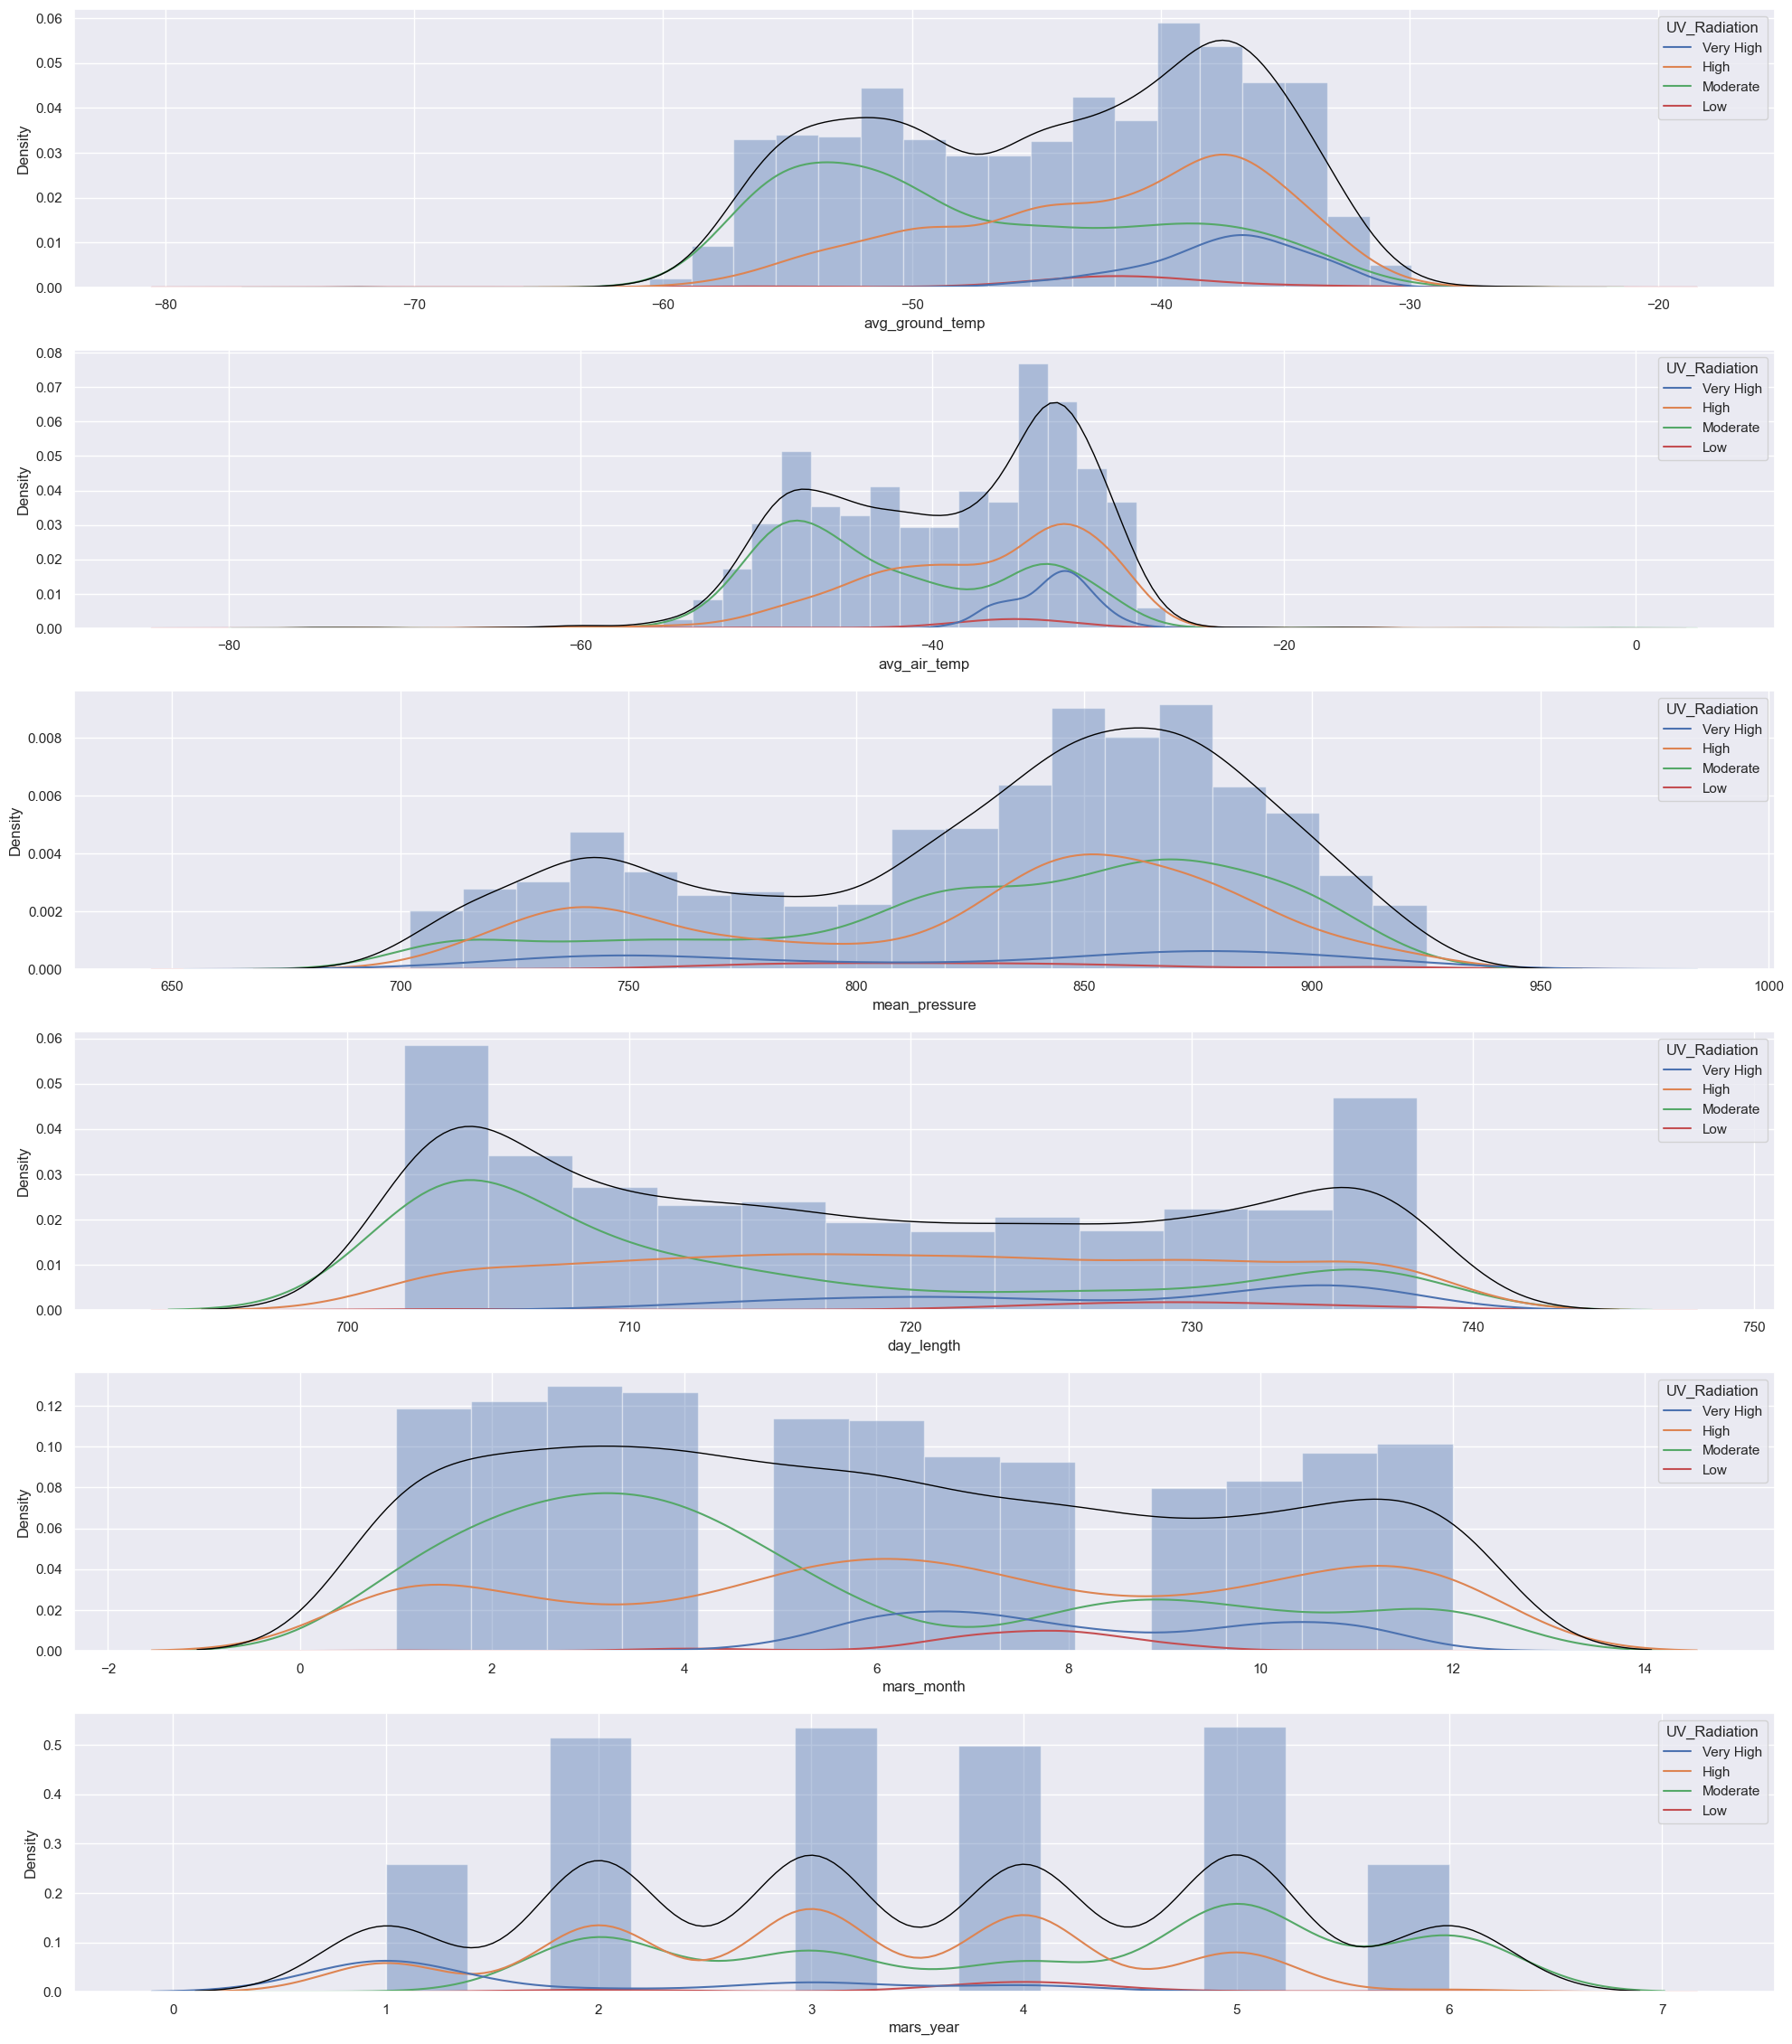

In [64]:
# Define the mapping for UV Radiation categories
uv_categories = {1: "Low", 2: "Moderate", 3: "High", 4: "Very High"}

# Create a copy of the dataframe
mars_df_copy = mars_df.copy()

# Map the UV Radiation values to their descriptive categories
mars_df_copy["UV_Radiation"] = mars_df_copy["UV_Radiation"].map(uv_categories)

# Define columns to plot
colms = ['avg_ground_temp', 'avg_air_temp', 'mean_pressure',
         'day_length', 'mars_month', 'mars_year']

plt.figure(figsize=(20,60))
for i in range(len(colms)):
    plt.subplot(16, 1, i+1)
    # Use the copied dataframe with mapped UV categories
    sns.kdeplot(data=mars_df_copy, x=colms[i], hue="UV_Radiation")
    sns.distplot(mars_df[colms[i]], kde_kws={"color": "black", "lw": 1, "label": "KDE"}, hist_kws={"color": "b"})

plt.tight_layout()

<Axes: title={'center': 'Rolling mean of uv radiation over monthly periods'}, xlabel='sol_number'>

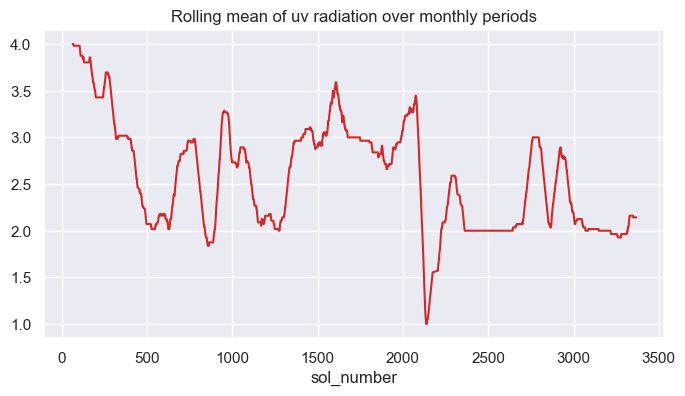

In [85]:
mars_df['UV_Radiation'].rolling(window = 56).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean of uv radiation over monthly periods")

---

## 6. Day Length

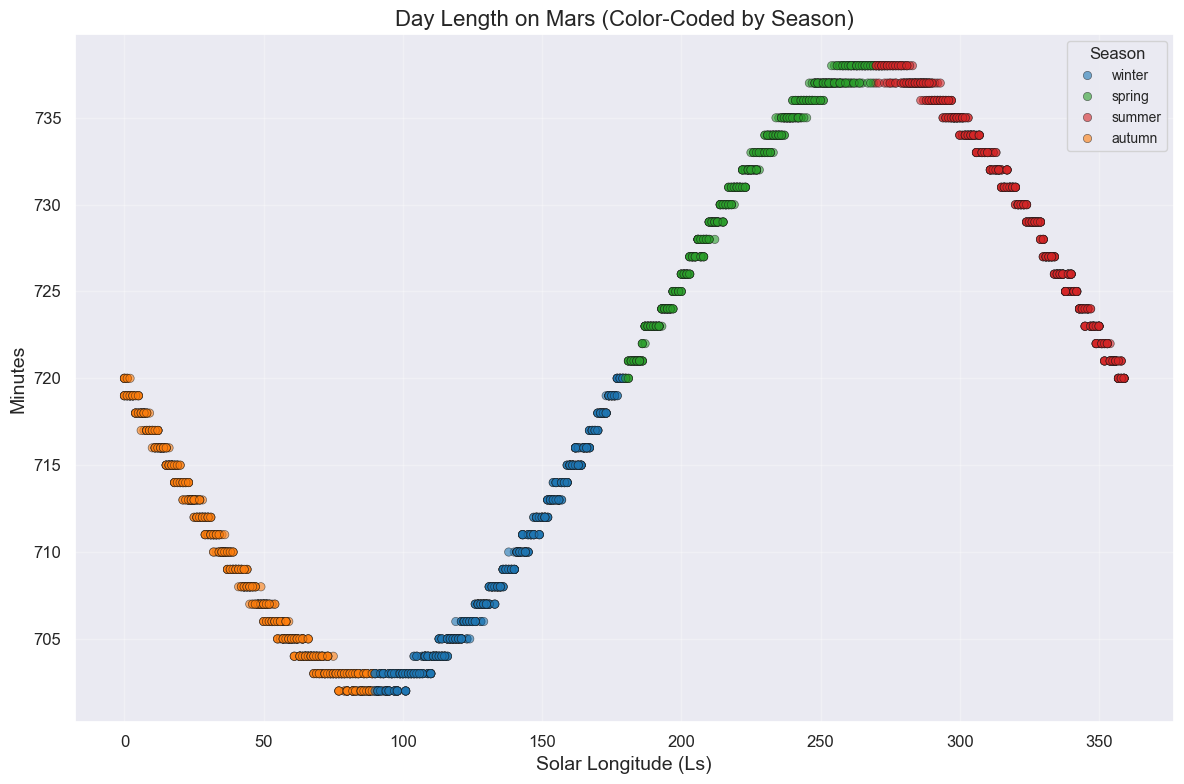

In [69]:
# Set up the figure
plt.figure(figsize=(12, 8))

# Scatter plot
sns.scatterplot(
    data=mars_df,
    x='Ls',
    y='day_length',
    hue='mars_season',
    palette=season_palette,
    alpha=0.6,
    edgecolor='k'
)

# Customize the plot
plt.title('Day Length on Mars (Color-Coded by Season)', fontsize=16)
plt.xlabel('Solar Longitude (Ls)', fontsize=14)
plt.ylabel('Minutes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

# Fix the legend to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys(), title='Season', fontsize=10, title_fontsize=12, loc='upper right')

plt.tight_layout()

# Show the plot
plt.show()

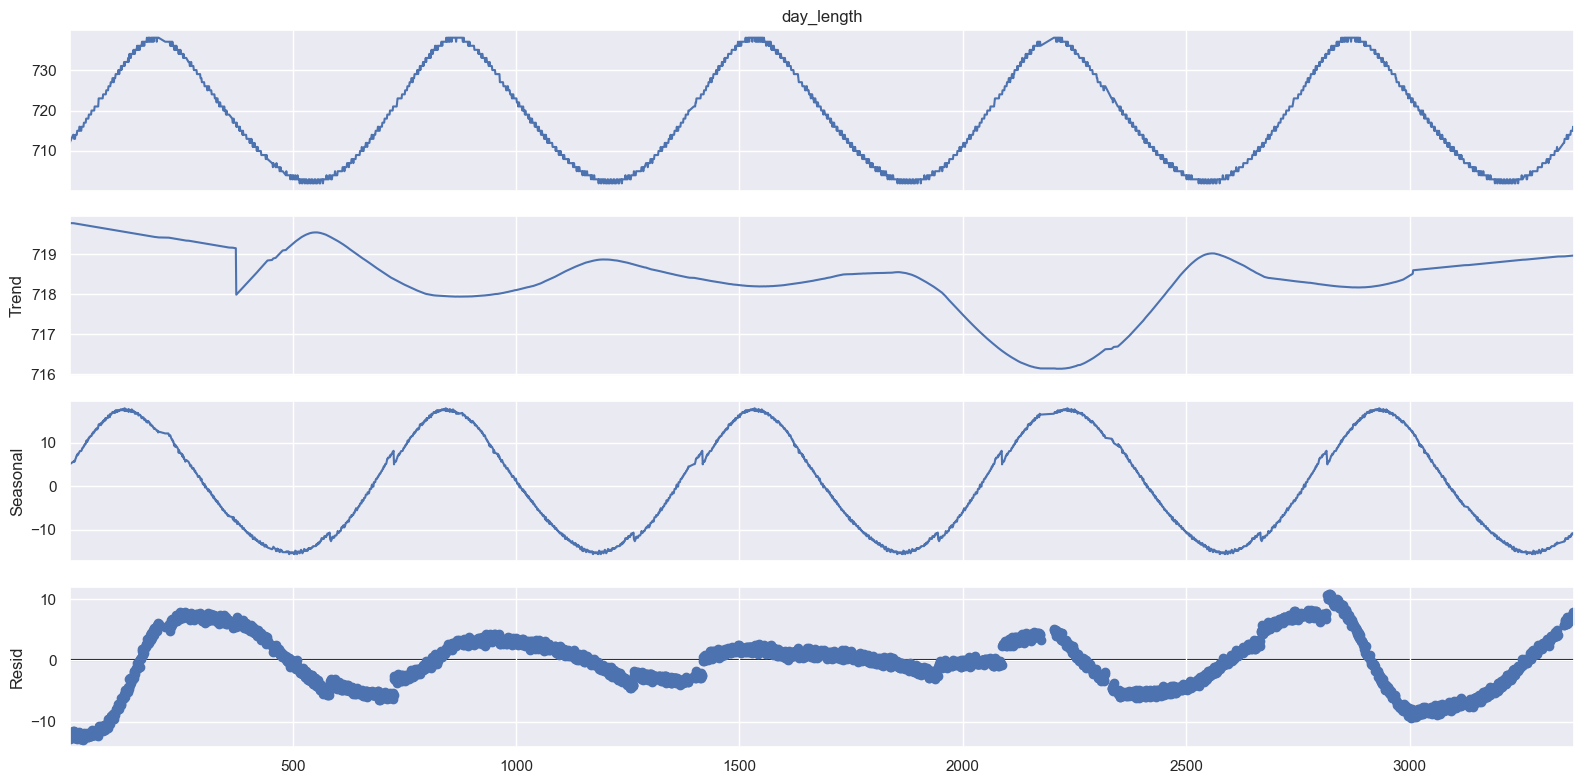

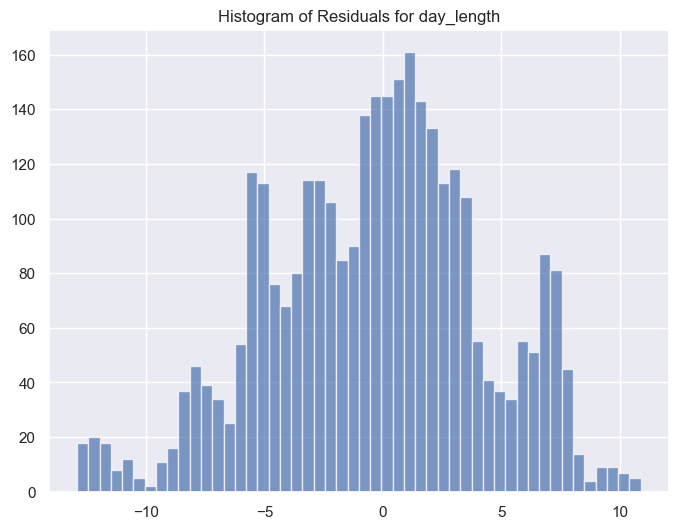

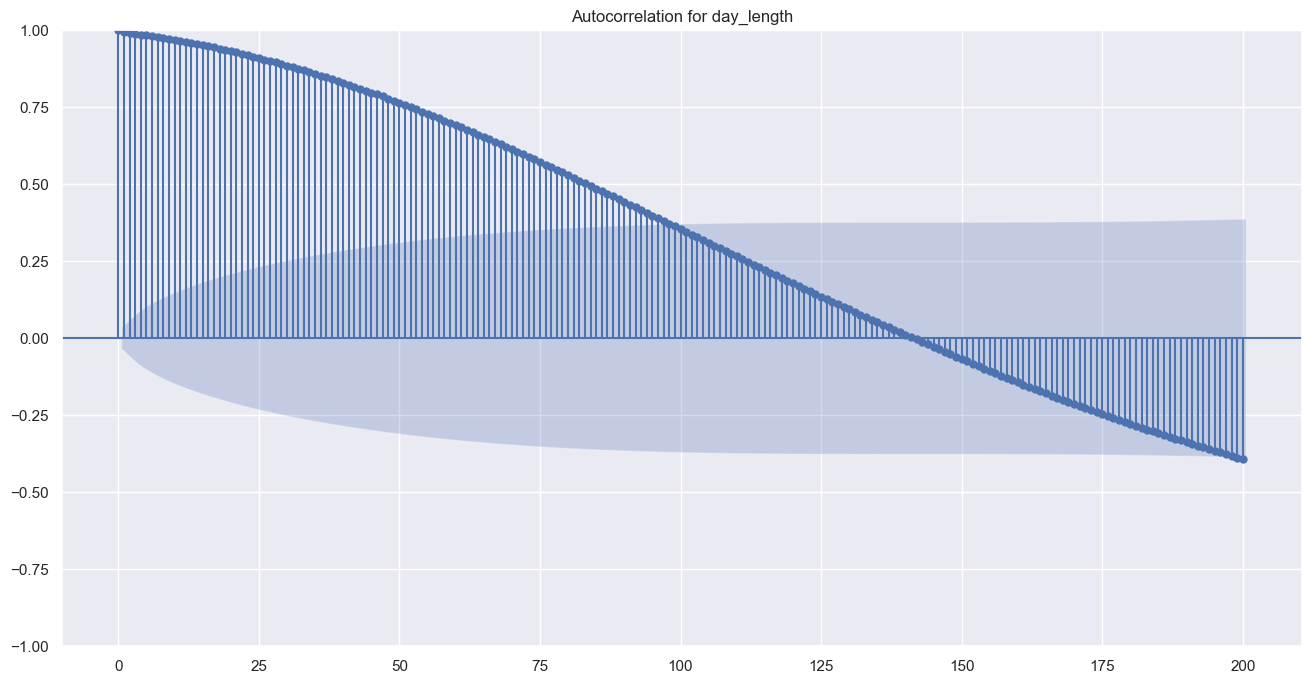


ADF Test Results for day_length:
1. ADF Statistic: -3.804877698664847
2. P-Value: 0.002857802164451381
3. Num of Lags: 28
4. Num of Observations: 3168
5. Critical Values:
	1%: -3.4324158480194886
	5%: -2.862452765302856
	10%: -2.5672558859467465


In [66]:
decompose_adf(mars_df, 'day_length')

<Axes: title={'center': 'Rolling mean of day length over monthly periods'}, xlabel='sol_number'>

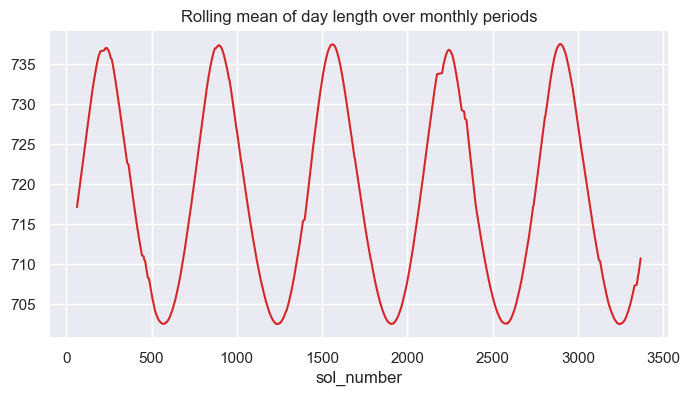

In [82]:
mars_df['day_length'].rolling(window = 56).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean of day length over monthly periods")

<Axes: title={'center': 'Rolling mean of day length over monthly periods'}, xlabel='sol_number'>

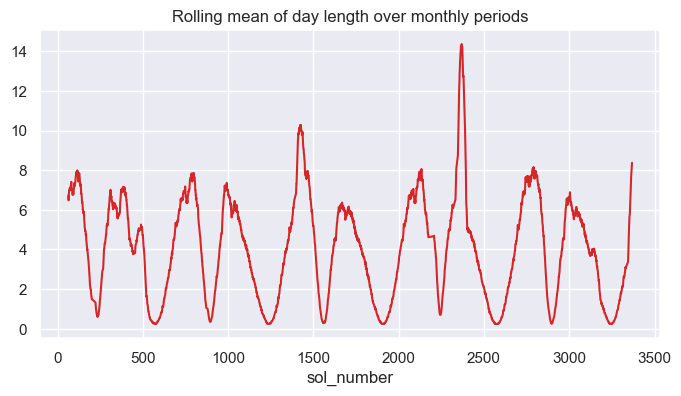

In [83]:
mars_df['day_length'].rolling(window = 56).var().plot(figsize=(8,4), color="tab:red", title="Rolling mean of day length over monthly periods")

---

## 7. Correlation Between Features

In [25]:
features = ['Ls',
            'day_length',
            'avg_ground_temp', 
            'avg_air_temp', 
            'mean_pressure', 
            'UV_Radiation']
sns.set(rc={"figure.figsize":(16, 8)})

### 7.1 Annual Trends

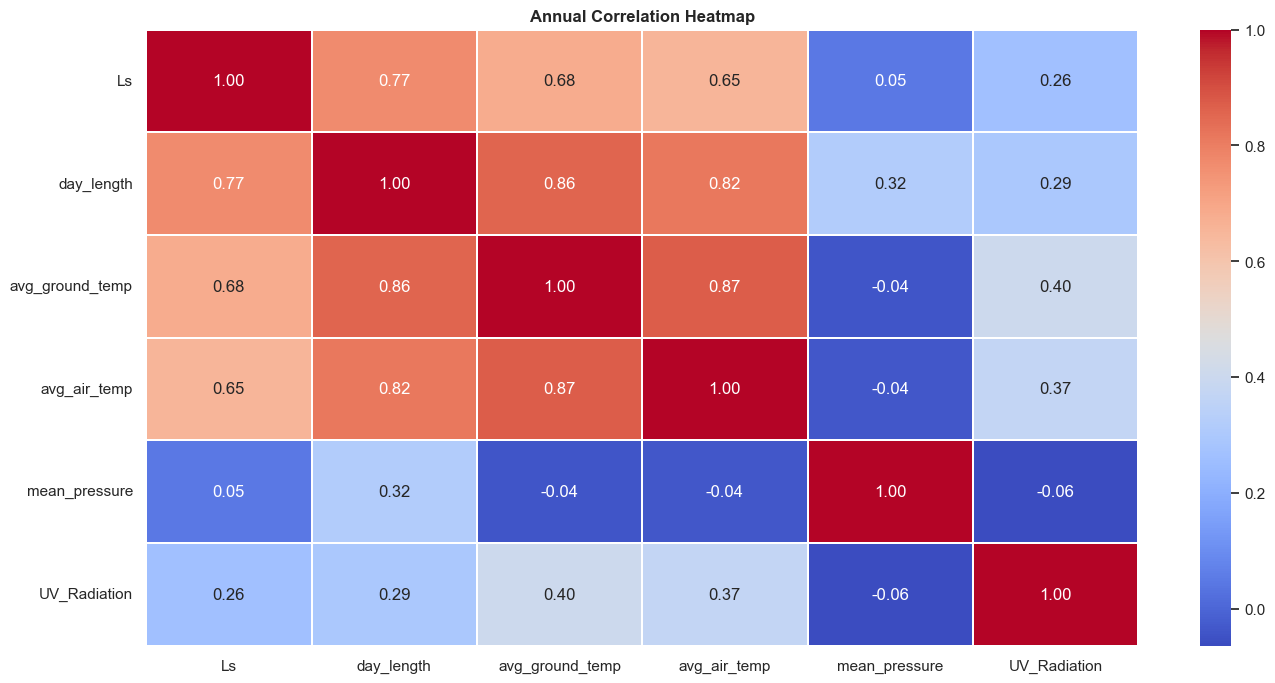

In [26]:
corr = mars_df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Annual Correlation Heatmap', weight='bold')
plt.show()

Pressure seems to be uncorrelated with anything besides day length. The should not be the case, a more detailed picture is required to test for correlation.

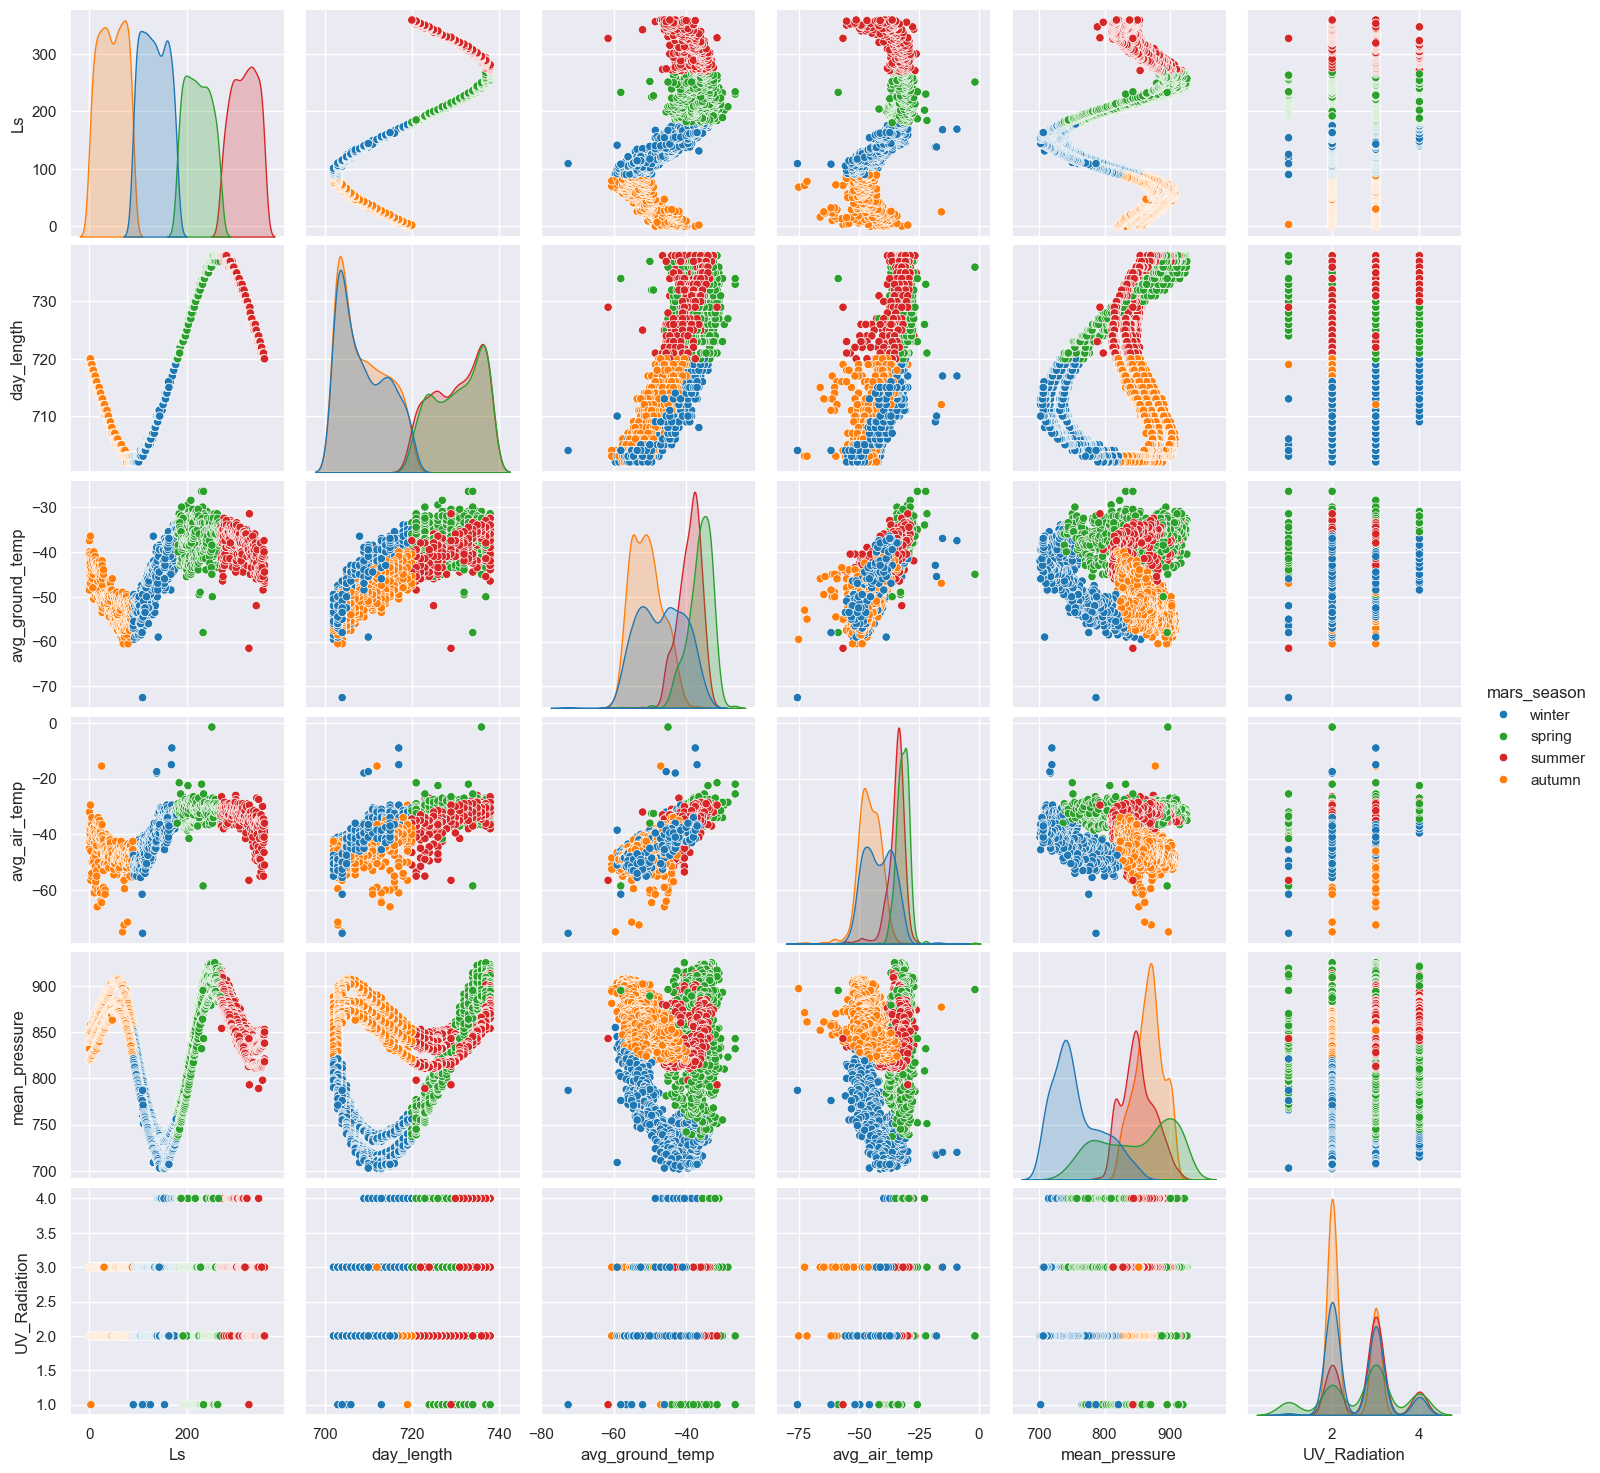

In [27]:
sns.pairplot(mars_df[features + ['mars_season']], hue='mars_season', palette=season_palette, diag_kind='kde')
plt.show()

Mean pressure exhibits some pretty interesting structure and seasonality in its relationship with just about everything. Perhaps more correlation can be observed if the data is broken up into the different seasons.

### 7.2 Seasonal Trends

#### Winter

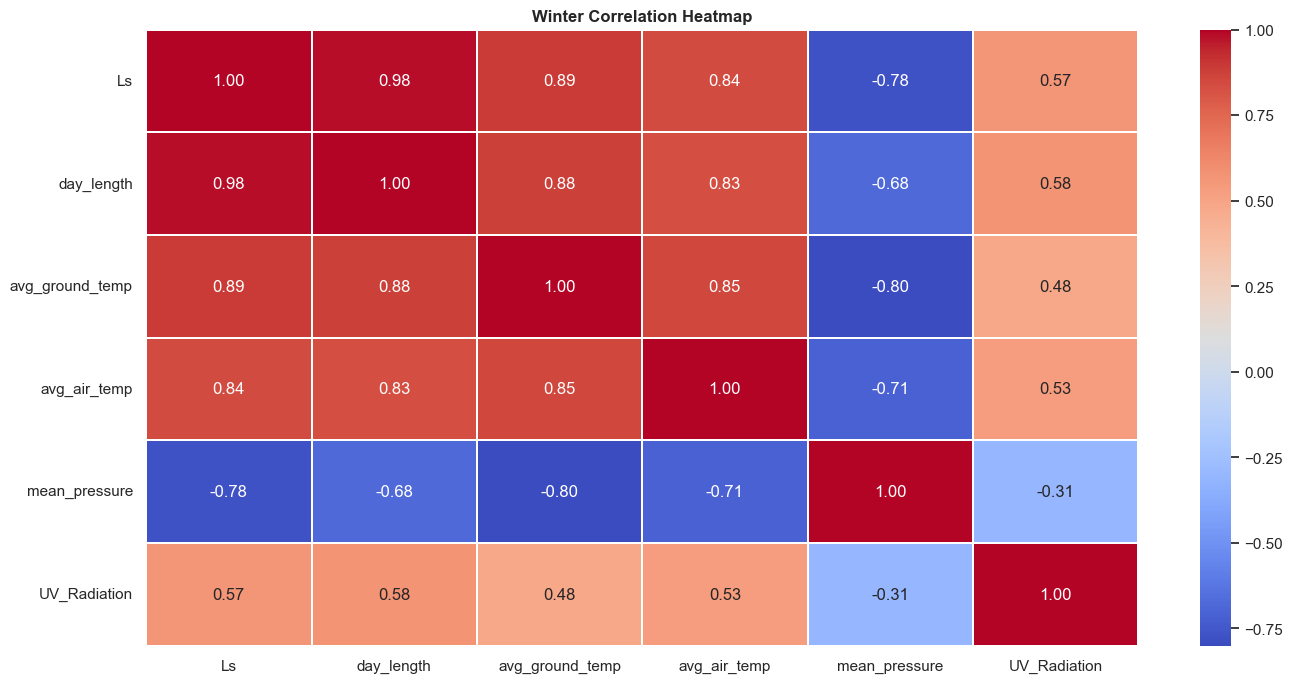

In [28]:
corr_winter = mars_df[mars_df['mars_season'] == 'winter'][features].corr()
sns.heatmap(corr_winter, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Winter Correlation Heatmap', weight='bold')
plt.show()

As expected, mean pressure is highly correlated with temperature. It is interesting that the correlation is different for air and ground temperatures.

#### Spring

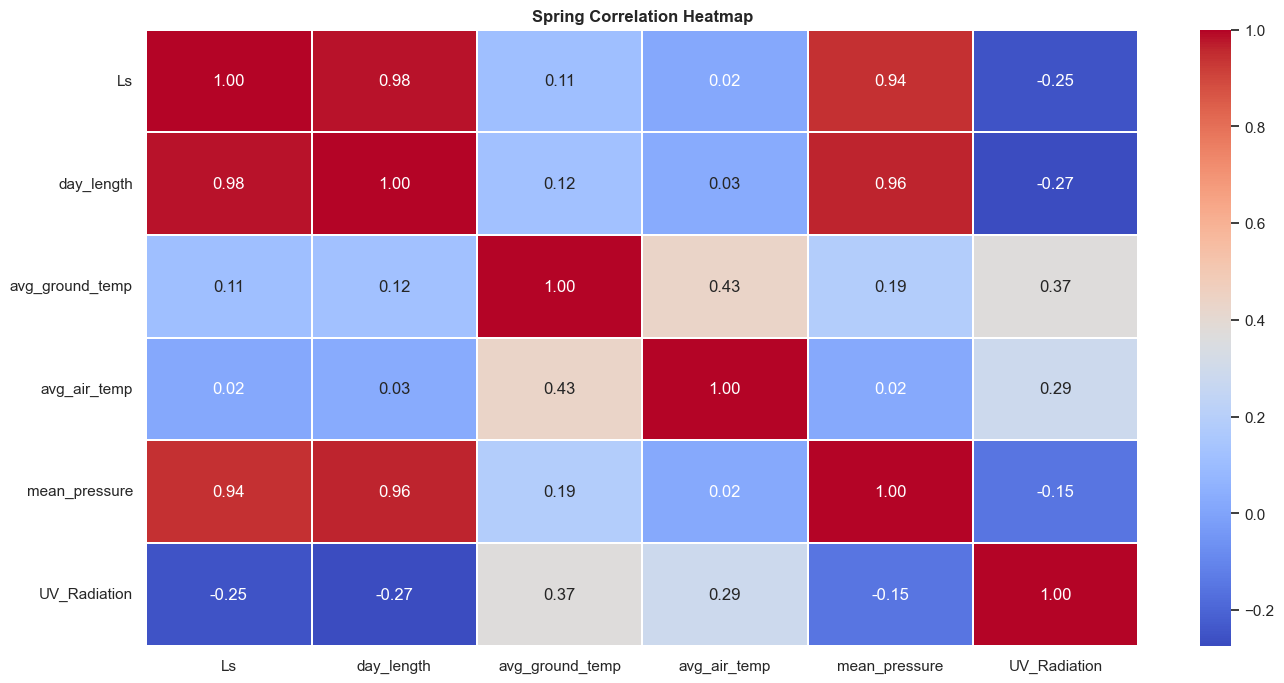

In [29]:
corr_spring = mars_df[mars_df['mars_season'] == 'spring'][features].corr()
sns.heatmap(corr_spring, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Spring Correlation Heatmap', weight='bold')
plt.show()

#### Summer

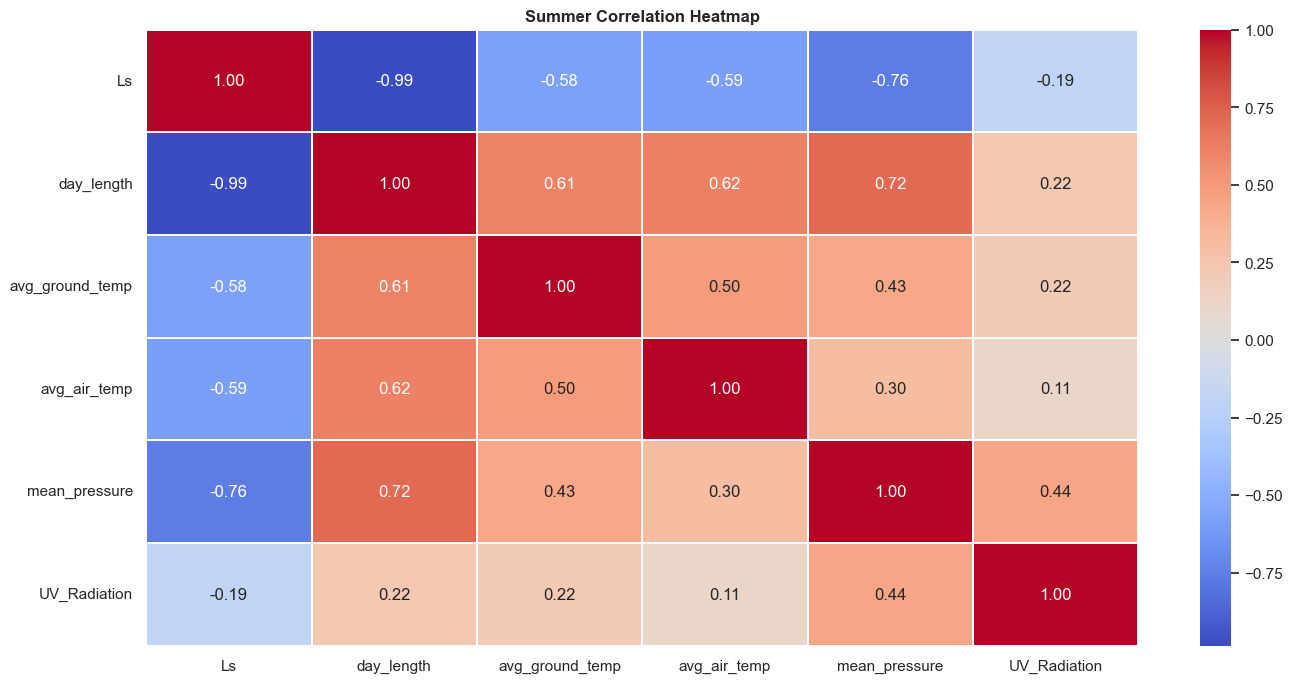

In [30]:
corr_summer = mars_df[mars_df['mars_season'] == 'summer'][features].corr()
sns.heatmap(corr_summer, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Summer Correlation Heatmap', weight='bold')
plt.show()

#### Autumn

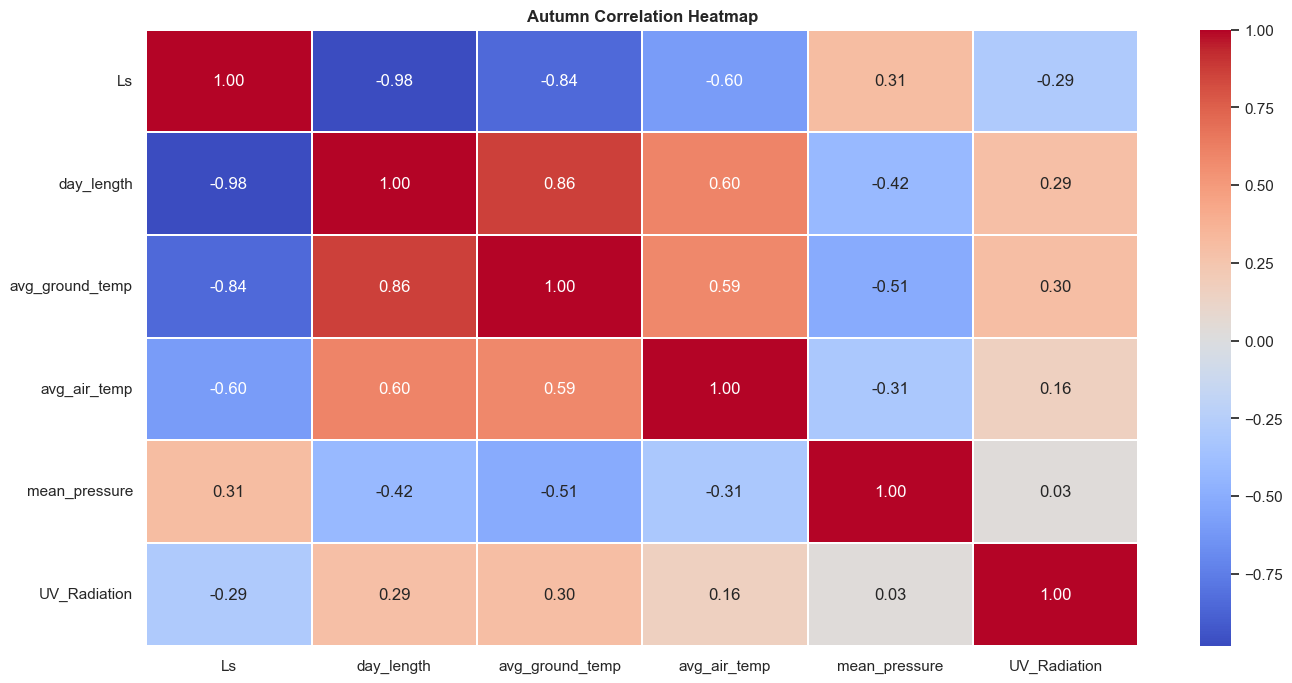

In [31]:
corr_autumn = mars_df[mars_df['mars_season'] == 'autumn'][features].corr()
sns.heatmap(corr_autumn, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.05)
plt.title('Autumn Correlation Heatmap', weight='bold')
plt.show()

Pressure appears most correlated with average temperatures during summer and winter months. This is supported by the autocorrelation analysis for pressure which indicates a bimodal seasonal trend. Interestingly, during winter pressure is negatively correlated while in summer it is positive. This could be due to ice cap sublimation and condensation during those times of year.  

### 7.3 Air Temperature Vs. Ground Temperature
Hypothesis: Ground temperature has lower variance and fewer extreme fluctuations than air temperature.

In [32]:
stat, p = levene(mars_df['avg_ground_temp'], mars_df['avg_air_temp'])
print(f"Levene test p-value: {p}")

if p < 0.05:
    print("Variances are significantly different.")
else:
    print("No significant difference in variance.")

Levene test p-value: 0.02660898310716404
Variances are significantly different.


In [33]:
def count_outliers(series):
    q1, q3 = np.percentile(series, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

air_outliers = count_outliers(mars_df['avg_air_temp'])
ground_outliers = count_outliers(mars_df['avg_ground_temp'])

print(f"Air Temp Outliers: {air_outliers}")
print(f"Ground Temp Outliers: {ground_outliers}")

Air Temp Outliers: 8
Ground Temp Outliers: 1


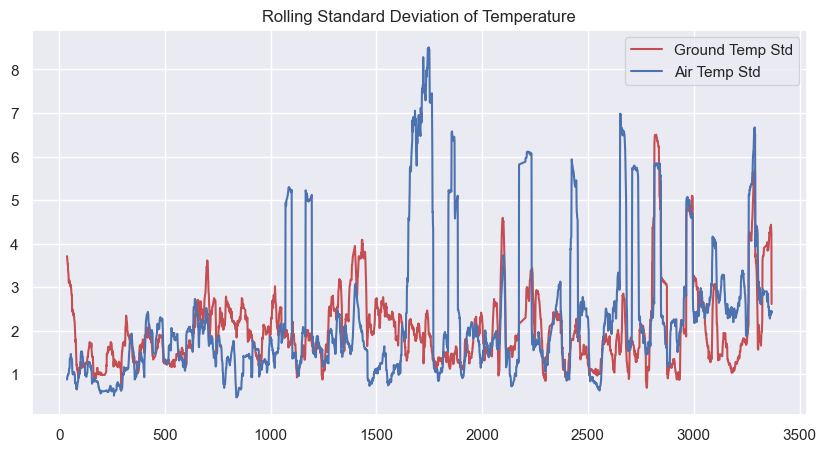

In [34]:
mars_df['ground_std'] = mars_df['avg_ground_temp'].rolling(window=30).std()
mars_df['air_std'] = mars_df['avg_air_temp'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(mars_df['ground_std'], label='Ground Temp Std', color='r')
plt.plot(mars_df['air_std'], label='Air Temp Std', color='b')
plt.legend()
plt.title("Rolling Standard Deviation of Temperature")
plt.show()

Instances where the standard deviation for the air temperature shifts dramatically without a corresponding shift for the ground temperature indicates there may be some sort of wweather event happening in the region. Something which may be interesting to investigate is where the air and ground temperature standard deviations spike in similar fashions at the same time.

---

### 7.5 Temperature and Pressure

Hypothesis: There is a significant relationship between mean atmospheric pressure and mean temperature on Mars.

In [35]:
print('GROUND TEMPERATURE')
# Pearson correlation
pearson_corr, pearson_p = pearsonr(mars_df['mean_pressure'], mars_df['avg_ground_temp'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(mars_df['mean_pressure'], mars_df['avg_ground_temp'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(mars_df['mean_pressure'], mars_df['avg_ground_temp'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")
print('------------------')
print('AIR TEMPERATURE')
# Pearson correlation
pearson_corr, pearson_p = pearsonr(mars_df['mean_pressure'], mars_df['avg_air_temp'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(mars_df['mean_pressure'], mars_df['avg_air_temp'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(mars_df['mean_pressure'], mars_df['avg_air_temp'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

GROUND TEMPERATURE
Pearson correlation: -0.04134603149037649, p-value: 0.019393807167532116
Spearman correlation: 0.0006147133108251812, p-value: 0.9722842393643044
Kendall correlation: -0.009964458563004755, p-value: 0.4041970620435652
------------------
AIR TEMPERATURE
Pearson correlation: -0.038134934323240936, p-value: 0.031070607046159993
Spearman correlation: 0.00833675035943463, p-value: 0.6374975232393542
Kendall correlation: -0.0018206259189685746, p-value: 0.8789908098592158


These results indicate that there is no direct correlation between pressure and temperature when tests are applied to the entire dataset. This reflects what was observed in the first heatmap from earlier. It will be necessary to test on a season by season basis.

In [36]:
# Get unique seasons
seasons = mars_df['mars_season'].unique()

for season in seasons:
    season_df = mars_df[mars_df['mars_season'] == season]  # Filter for the current season
    print(f"===== SEASON: {season} =====")

    print('GROUND TEMPERATURE')
    if len(season_df) > 1:  # Ensure there's enough data to compute correlation
        # Pearson correlation
        pearson_corr, pearson_p = pearsonr(season_df['mean_pressure'], season_df['avg_ground_temp'])
        print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

        # Spearman correlation
        spearman_corr, spearman_p = spearmanr(season_df['mean_pressure'], season_df['avg_ground_temp'])
        print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

        # Kendall correlation
        kendall_corr, kendall_p = kendalltau(season_df['mean_pressure'], season_df['avg_ground_temp'])
        print(f"Kendall correlation: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
    else:
        print("Not enough data for correlation analysis.")

    print('------------------')

    print('AIR TEMPERATURE')
    if len(season_df) > 1:
        # Pearson correlation
        pearson_corr, pearson_p = pearsonr(season_df['mean_pressure'], season_df['avg_air_temp'])
        print(f"Pearson correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")

        # Spearman correlation
        spearman_corr, spearman_p = spearmanr(season_df['mean_pressure'], season_df['avg_air_temp'])
        print(f"Spearman correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

        # Kendall correlation
        kendall_corr, kendall_p = kendalltau(season_df['mean_pressure'], season_df['avg_air_temp'])
        print(f"Kendall correlation: {kendall_corr:.4f}, p-value: {kendall_p:.4f}")
    else:
        print("Not enough data for correlation analysis.")

    print("\n" + "="*30 + "\n")


===== SEASON: winter =====
GROUND TEMPERATURE
Pearson correlation: -0.8007, p-value: 0.0000
Spearman correlation: -0.7968, p-value: 0.0000
Kendall correlation: -0.6142, p-value: 0.0000
------------------
AIR TEMPERATURE
Pearson correlation: -0.7106, p-value: 0.0000
Spearman correlation: -0.7444, p-value: 0.0000
Kendall correlation: -0.5351, p-value: 0.0000


===== SEASON: spring =====
GROUND TEMPERATURE
Pearson correlation: 0.1878, p-value: 0.0000
Spearman correlation: 0.2293, p-value: 0.0000
Kendall correlation: 0.1542, p-value: 0.0000
------------------
AIR TEMPERATURE
Pearson correlation: 0.0228, p-value: 0.5549
Spearman correlation: -0.0407, p-value: 0.2921
Kendall correlation: -0.0377, p-value: 0.1571


===== SEASON: summer =====
GROUND TEMPERATURE
Pearson correlation: 0.4295, p-value: 0.0000
Spearman correlation: 0.4847, p-value: 0.0000
Kendall correlation: 0.3344, p-value: 0.0000
------------------
AIR TEMPERATURE
Pearson correlation: 0.3046, p-value: 0.0000
Spearman correlation

Pressure and temperature are extremely strongly correlated in the winter. The rest of the seasons are rather muted in comparison which suggests cooling may have a stronger effect on pressure than warming.

In [37]:
data = mars_df[['avg_ground_temp', 'mean_pressure']]
max_lags = 6
results = grangercausalitytests(data, max_lags, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6495  , p=0.1991  , df_denom=3193, df_num=1
ssr based chi2 test:   chi2=1.6510  , p=0.1988  , df=1
likelihood ratio test: chi2=1.6506  , p=0.1989  , df=1
parameter F test:         F=1.6495  , p=0.1991  , df_denom=3193, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9154  , p=0.0543  , df_denom=3190, df_num=2
ssr based chi2 test:   chi2=5.8399  , p=0.0539  , df=2
likelihood ratio test: chi2=5.8346  , p=0.0541  , df=2
parameter F test:         F=2.9154  , p=0.0543  , df_denom=3190, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.6769  , p=0.0007  , df_denom=3187, df_num=3
ssr based chi2 test:   chi2=17.0681 , p=0.0007  , df=3
likelihood ratio test: chi2=17.0227 , p=0.0007  , df=3
parameter F test:         F=5.6769  , p=0.0007  , df_denom=3187, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.7913  , p=0.

From the results of the Granger Causality test, it appears that ground temperature does have an effect on pressure, but with a several days of lag.

In [38]:
def plot_3d(mars_df, x_col, y_col, z_col, season_col, season_palette, interactive=False):
    """
    Plots a 3D scatter plot of three selected features from a given DataFrame, colored by season.
    
    Parameters:
    mars_df (pd.DataFrame): The input DataFrame.
    x_col (str): Column name for the x-axis.
    y_col (str): Column name for the y-axis.
    z_col (str): Column name for the z-axis.
    season_col (str): Column name for the season category.
    season_palette (dict): Dictionary mapping season names to colors.
    interactive (bool): If True, use Plotly for an interactive plot; otherwise, use Matplotlib.
    """
    
    if interactive:
        fig = px.scatter_3d(mars_df, x=x_col, y=y_col, z=z_col, color=mars_df[season_col].map(season_palette), 
                            title=f'3D Scatter Plot of {x_col}, {y_col}, {z_col} by Season')
        fig.update_layout(scene=dict(
            xaxis_title=x_col,
            yaxis_title=y_col,
            zaxis_title=z_col
        ))
        
        fig.show()
    else:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        
        for season, color in season_palette.items():
            subset = mars_df[mars_df[season_col] == season]
            ax.scatter(subset[x_col], subset[y_col], subset[z_col], c=color, label=season, alpha=0.7)
        
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)
        ax.set_title(f'3D Scatter Plot of {x_col}, {y_col}, {z_col} by Season')
        ax.legend()
        
        plt.show()

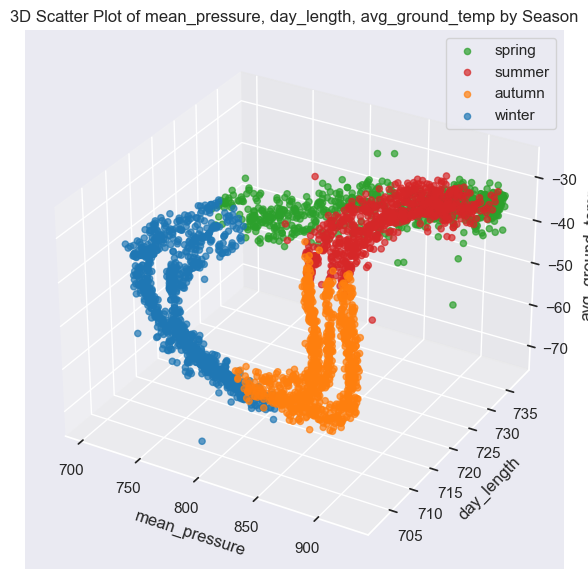

In [39]:
plot_3d(mars_df, 'mean_pressure', 'day_length', 'avg_ground_temp', 'mars_season', season_palette)

In [40]:
# ANOVA: Check if temp/pressure means differ across UV categories
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for temperature
model_temp = ols('avg_ground_temp ~ C(UV_Radiation)', data=mars_df).fit()
anova_temp = sm.stats.anova_lm(model_temp, typ=2)

# ANOVA for pressure
model_pressure = ols('mean_pressure ~ C(UV_Radiation)', data=mars_df).fit()
anova_pressure = sm.stats.anova_lm(model_pressure, typ=2)

print("ANOVA Results for Temperature & UV Radiation:\n", anova_temp)
print("\nANOVA Results for Pressure & UV Radiation:\n", anova_pressure)


ANOVA Results for Temperature & UV Radiation:
                         sum_sq      df           F         PR(>F)
C(UV_Radiation)   35533.548907     3.0  270.994995  1.087701e-156
Residual         139558.077418  3193.0         NaN            NaN

ANOVA Results for Pressure & UV Radiation:
                        sum_sq      df         F    PR(>F)
C(UV_Radiation)  6.987177e+04     3.0  7.153531  0.000087
Residual         1.039583e+07  3193.0       NaN       NaN


In [41]:
# Kruskal-Wallis test (non-parametric ANOVA alternative)
kruskal_temp = stats.kruskal(
    mars_df[mars_df['UV_Radiation'] == 1]['avg_ground_temp'],
    mars_df[mars_df['UV_Radiation'] == 2]['avg_ground_temp'],
    mars_df[mars_df['UV_Radiation'] == 3]['avg_ground_temp'],
    mars_df[mars_df['UV_Radiation'] == 4]['avg_ground_temp']
)

kruskal_pressure = stats.kruskal(
    mars_df[mars_df['UV_Radiation'] == 1]['mean_pressure'],
    mars_df[mars_df['UV_Radiation'] == 2]['mean_pressure'],
    mars_df[mars_df['UV_Radiation'] == 3]['mean_pressure'],
    mars_df[mars_df['UV_Radiation'] == 4]['mean_pressure']
)

print("\nKruskal-Wallis Results:")
print(f"Temperature & UV: H={kruskal_temp.statistic}, p={kruskal_temp.pvalue}")
print(f"Pressure & UV: H={kruskal_pressure.statistic}, p={kruskal_pressure.pvalue}")



Kruskal-Wallis Results:
Temperature & UV: H=640.1031257361294, p=2.0375780351954966e-138
Pressure & UV: H=21.585336605453637, p=7.956117439052357e-05
